In [1]:
!pip install torch torchvision torchaudio

In [2]:
pip install ultralytics pandas opencv-python matplotlib pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 599.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 5.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import cv2
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
import cv2
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from PIL import Image
from torchvision import transforms
from PIL import Image
import numpy

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
!nvidia-smi

Fri Sep 13 08:03:02 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [6]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/kaggle/working/yolov9


In [7]:
!pip install roboflow  

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.2 MB/s eta 0:00:00eta 0:00:01


In [8]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [9]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Sep 13 08:03 .
drwxr-xr-x 5 root root      4096 Sep 13 08:03 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [10]:
%cd {HOME}/yolov9

/kaggle/working/yolov9


In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="13oqBLhJj3F9S2J0QpH2")
project = rf.workspace("diabetic-foot-ulcer").project("dfu-z3jyt")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DFU-1 in yolov9:: 100%|██████████| 3934/3934 [00:00<00:00, 7812.02it/s]


# TRAIN CUSTOM MODEL

## Gelan-e

In [12]:
!python detect.py --weights {HOME}/weights/gelan-e.pt --conf 0.1 --source /kaggle/working/yolov9/DFU-1/train/images/101963_jpg.rf.afa1e6ccd70925520f8984713e7dafc3.jpg --device 0

detect: weights=['/kaggle/working/weights/gelan-e.pt'], source=/kaggle/working/yolov9/DFU-1/train/images/101963_jpg.rf.afa1e6ccd70925520f8984713e7dafc3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

/kaggle/working/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-model

In [13]:
%cd {HOME}/yolov9

!python train.py \
--batch 5 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-e.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

/kaggle/working/yolov9
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=/kaggle/working/weights/gelan-e.pt, cfg=models/detect/gelan-e.yaml, data=/kaggle/working/yolov9/DFU-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=50, batch_size=5, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T

## Training Results

In [14]:
!ls {HOME}/yolov9/runs/train/exp/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
events.out.tfevents.1726214691.749a22f60c60.134.0  val_batch0_pred.jpg
hyp.yaml					   val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
opt.yaml					   val_batch2_pred.jpg
results.csv					   weights


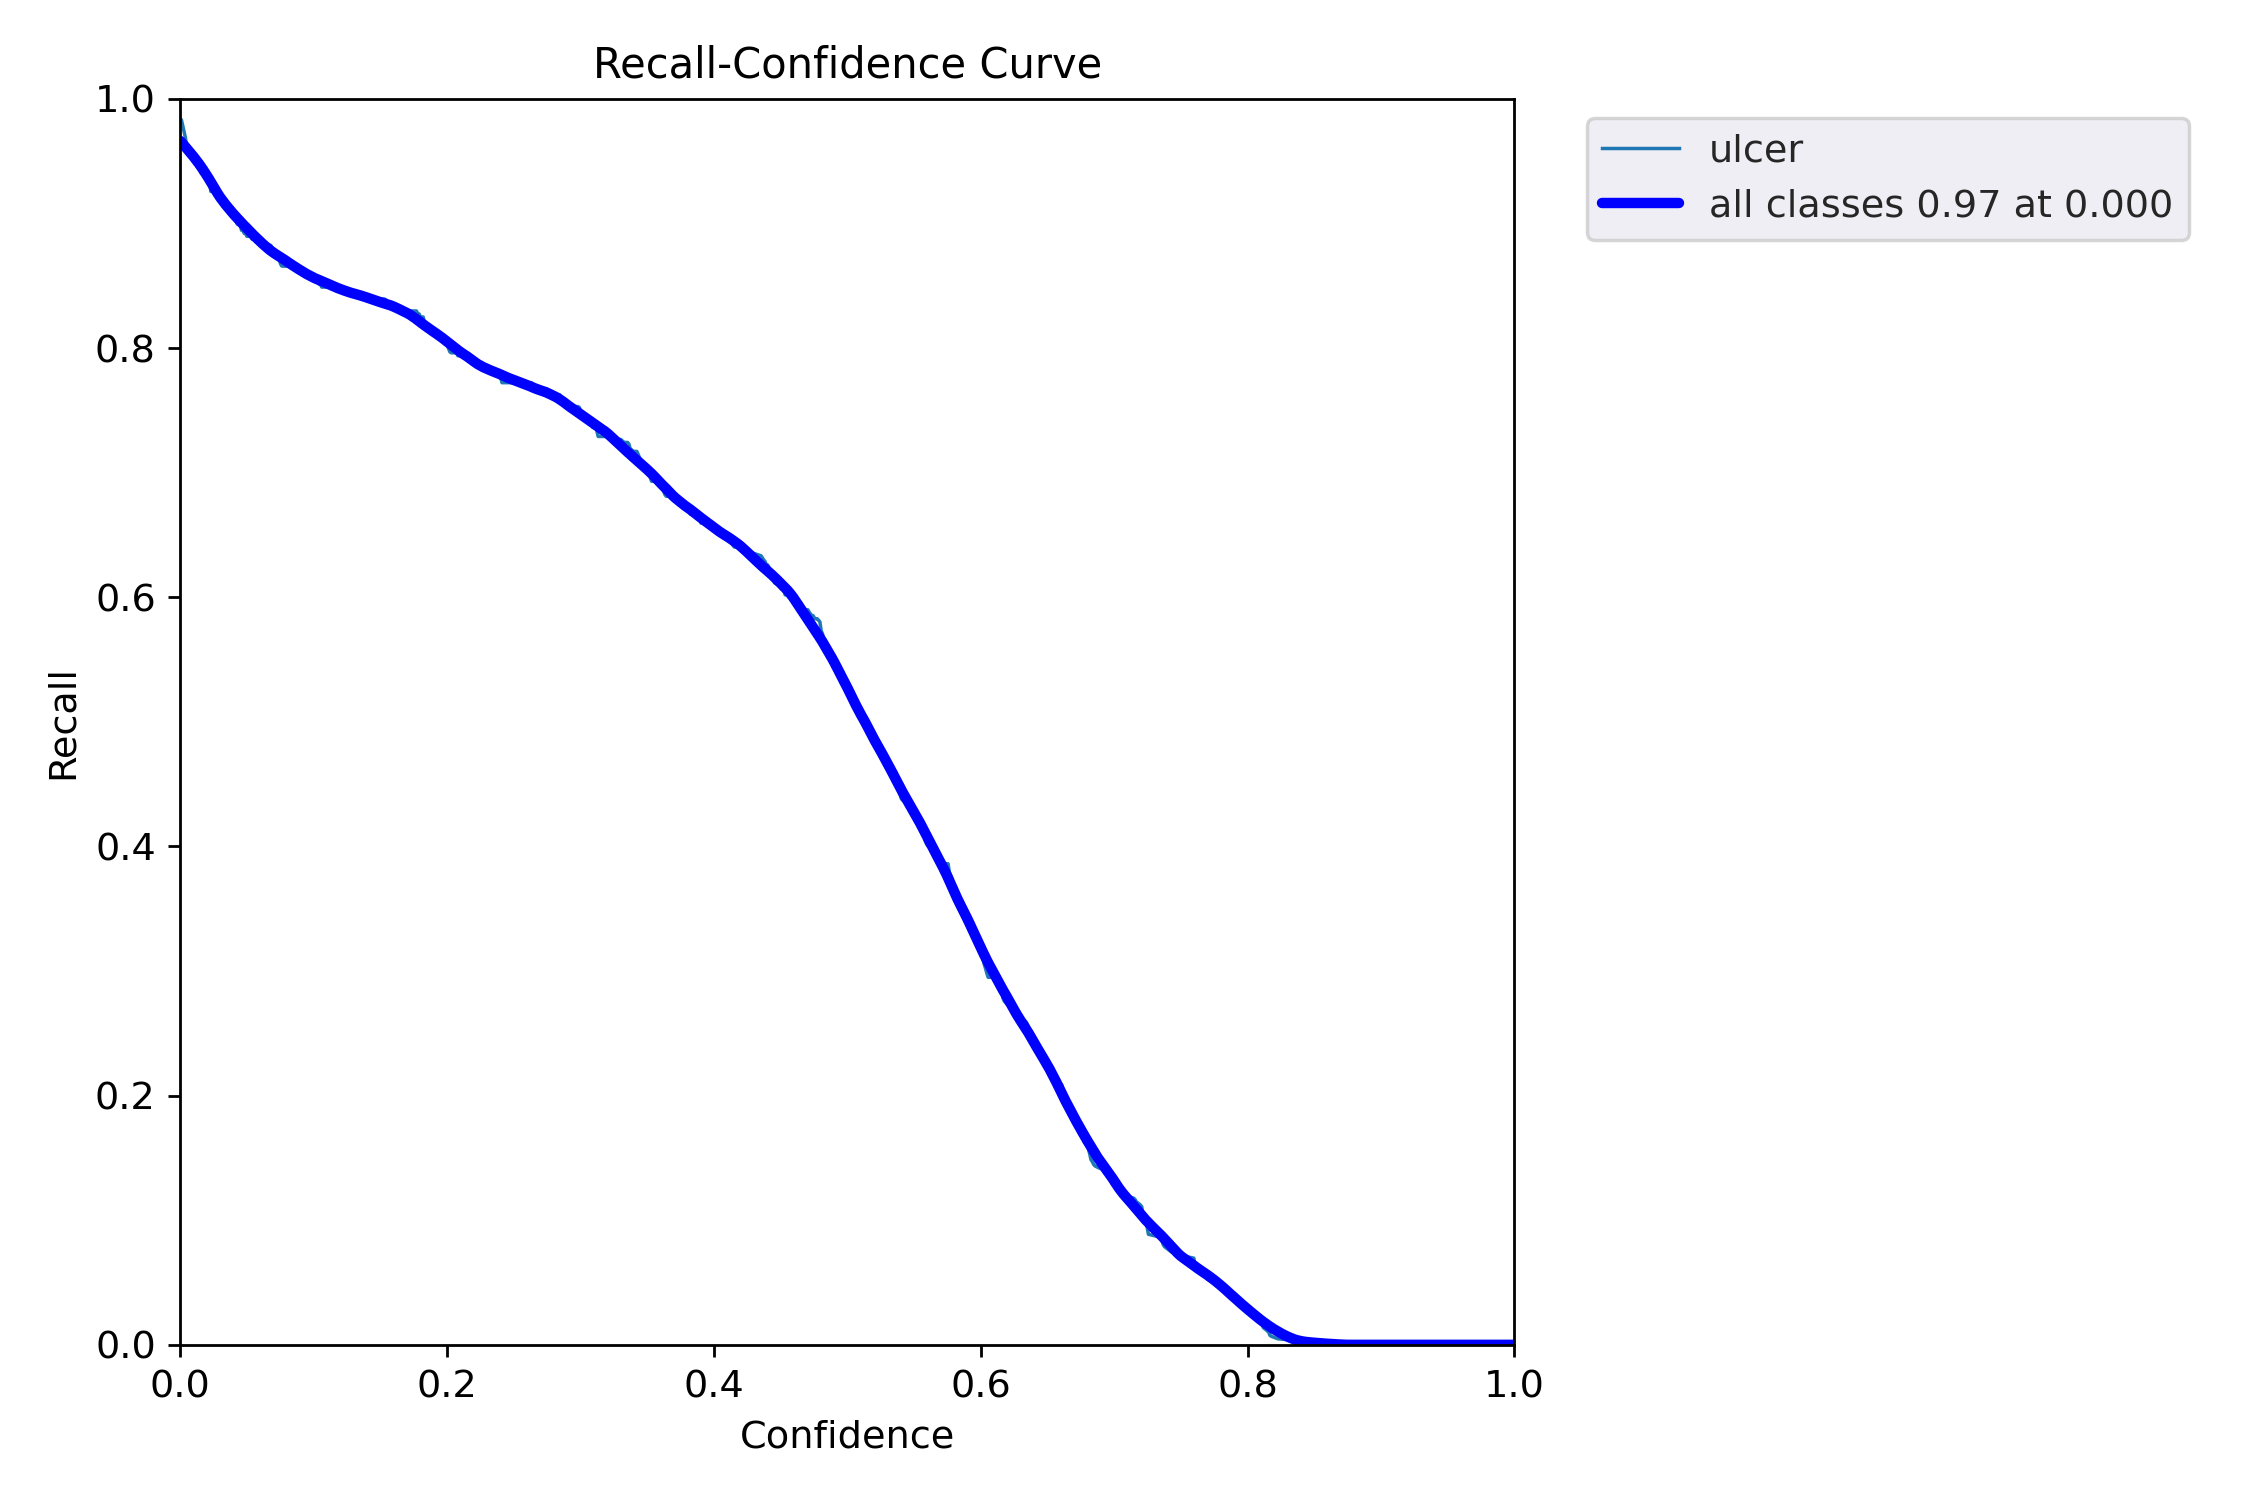

In [18]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/R_curve.png", width=1000)

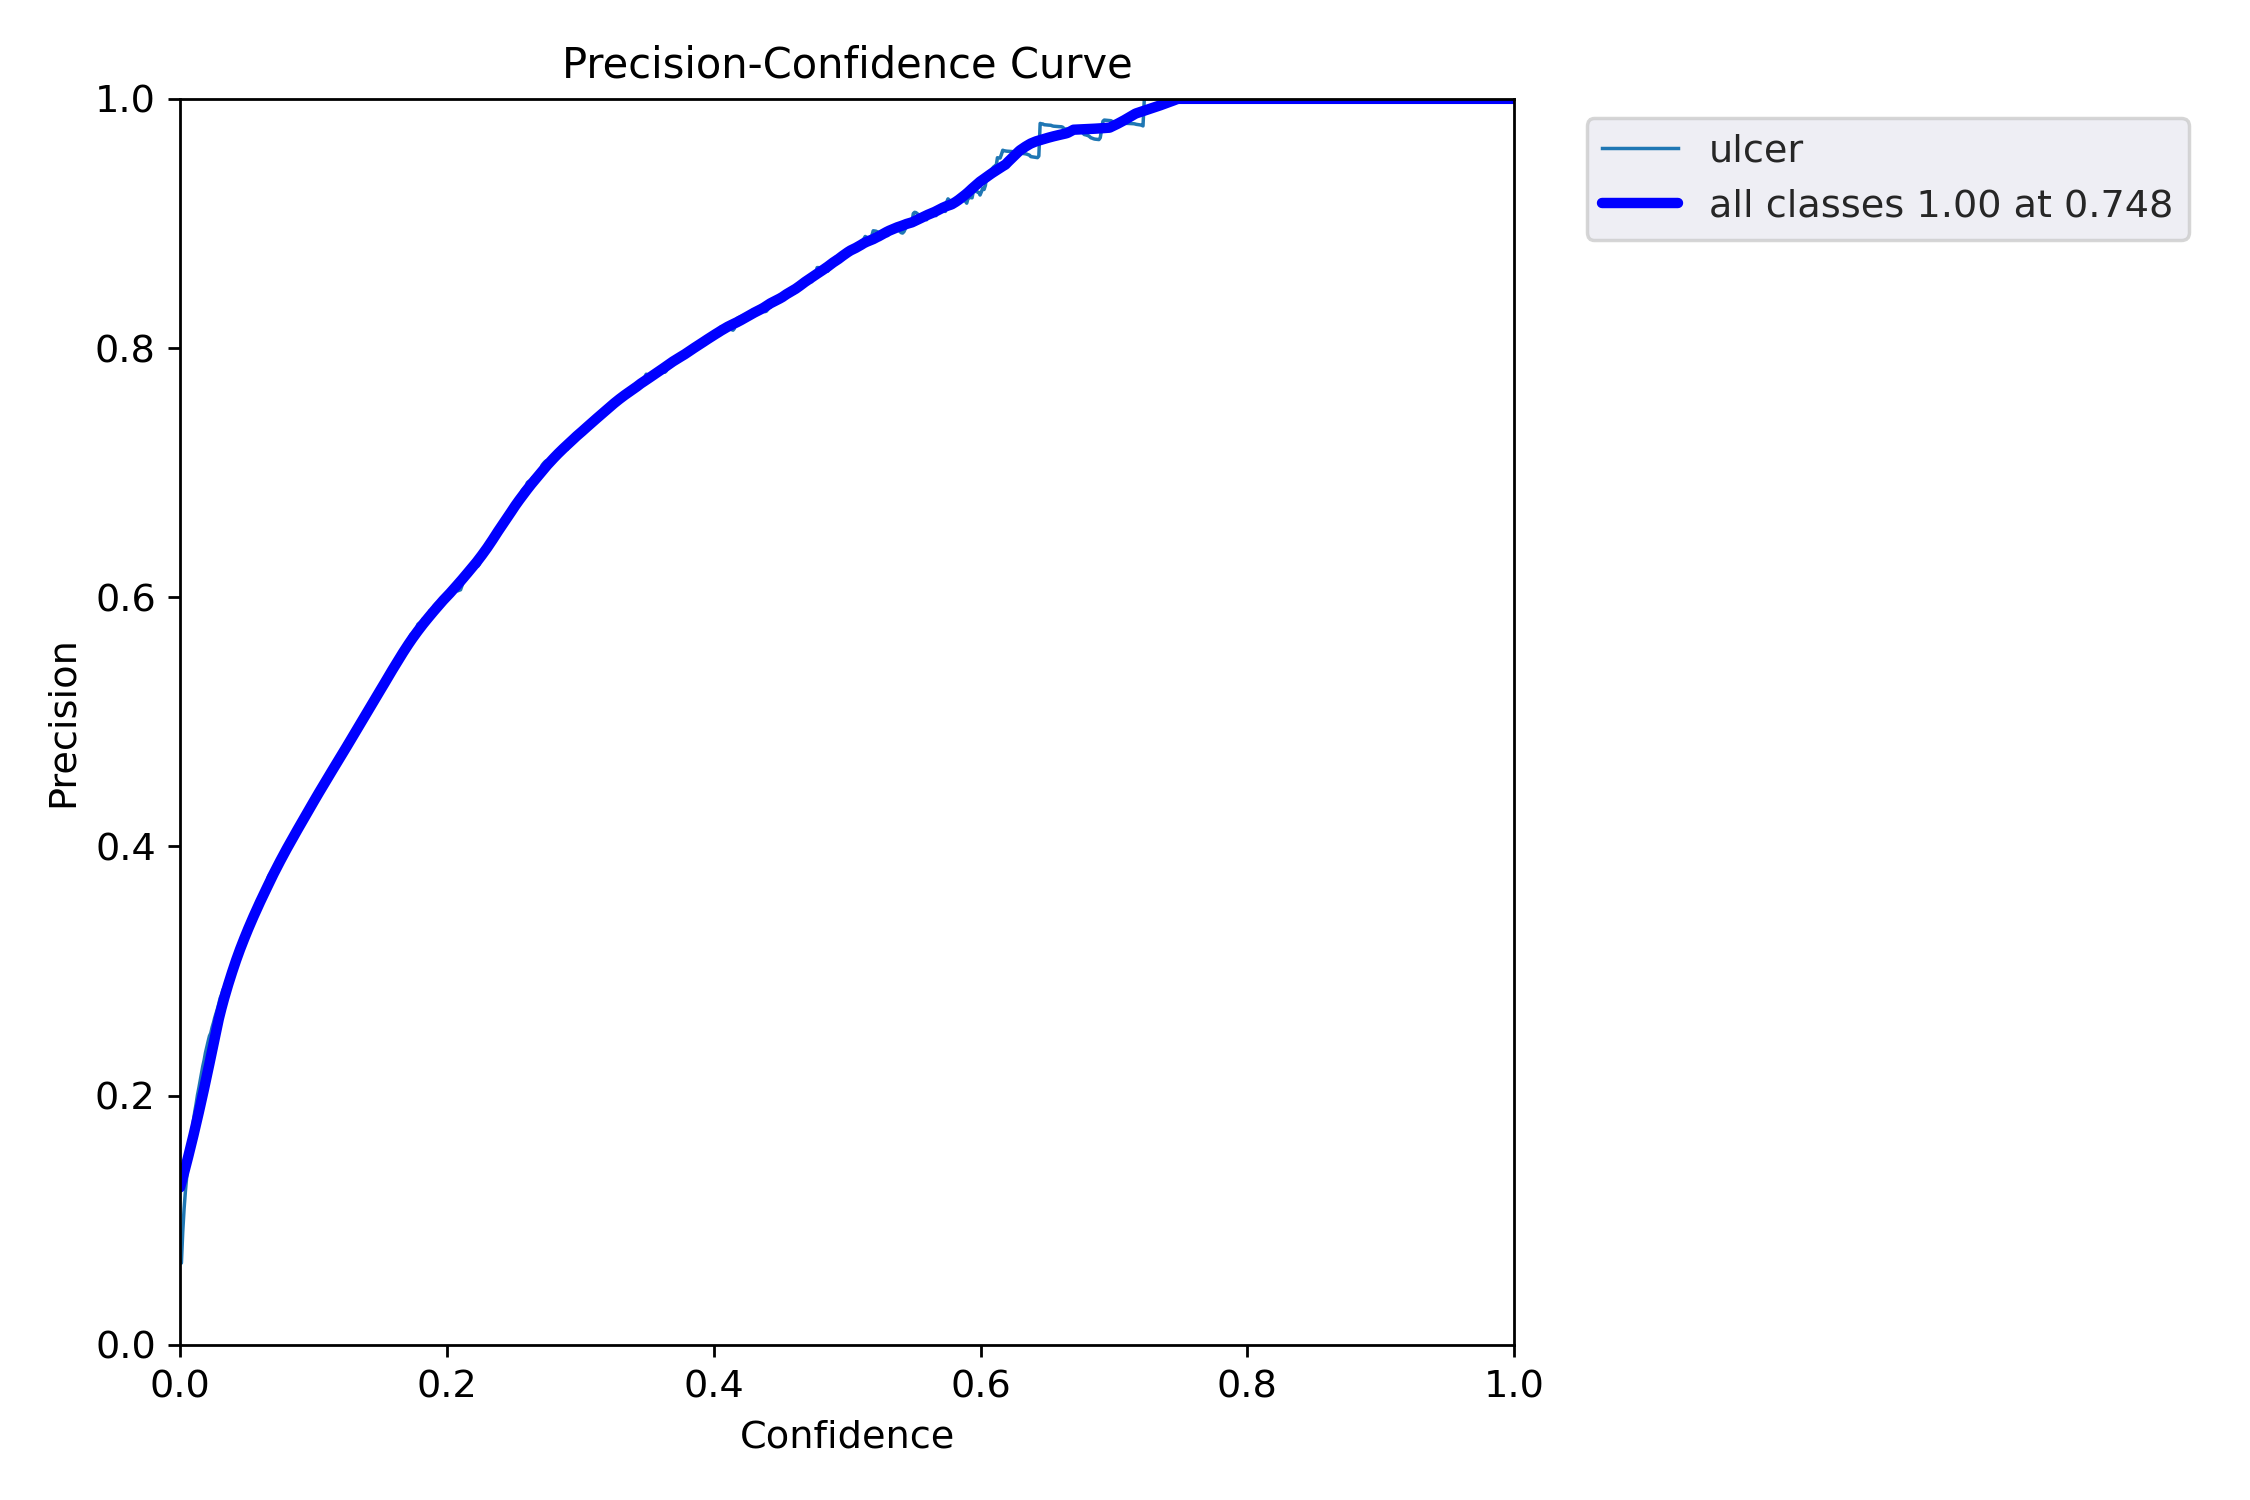

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/P_curve.png", width=1000)

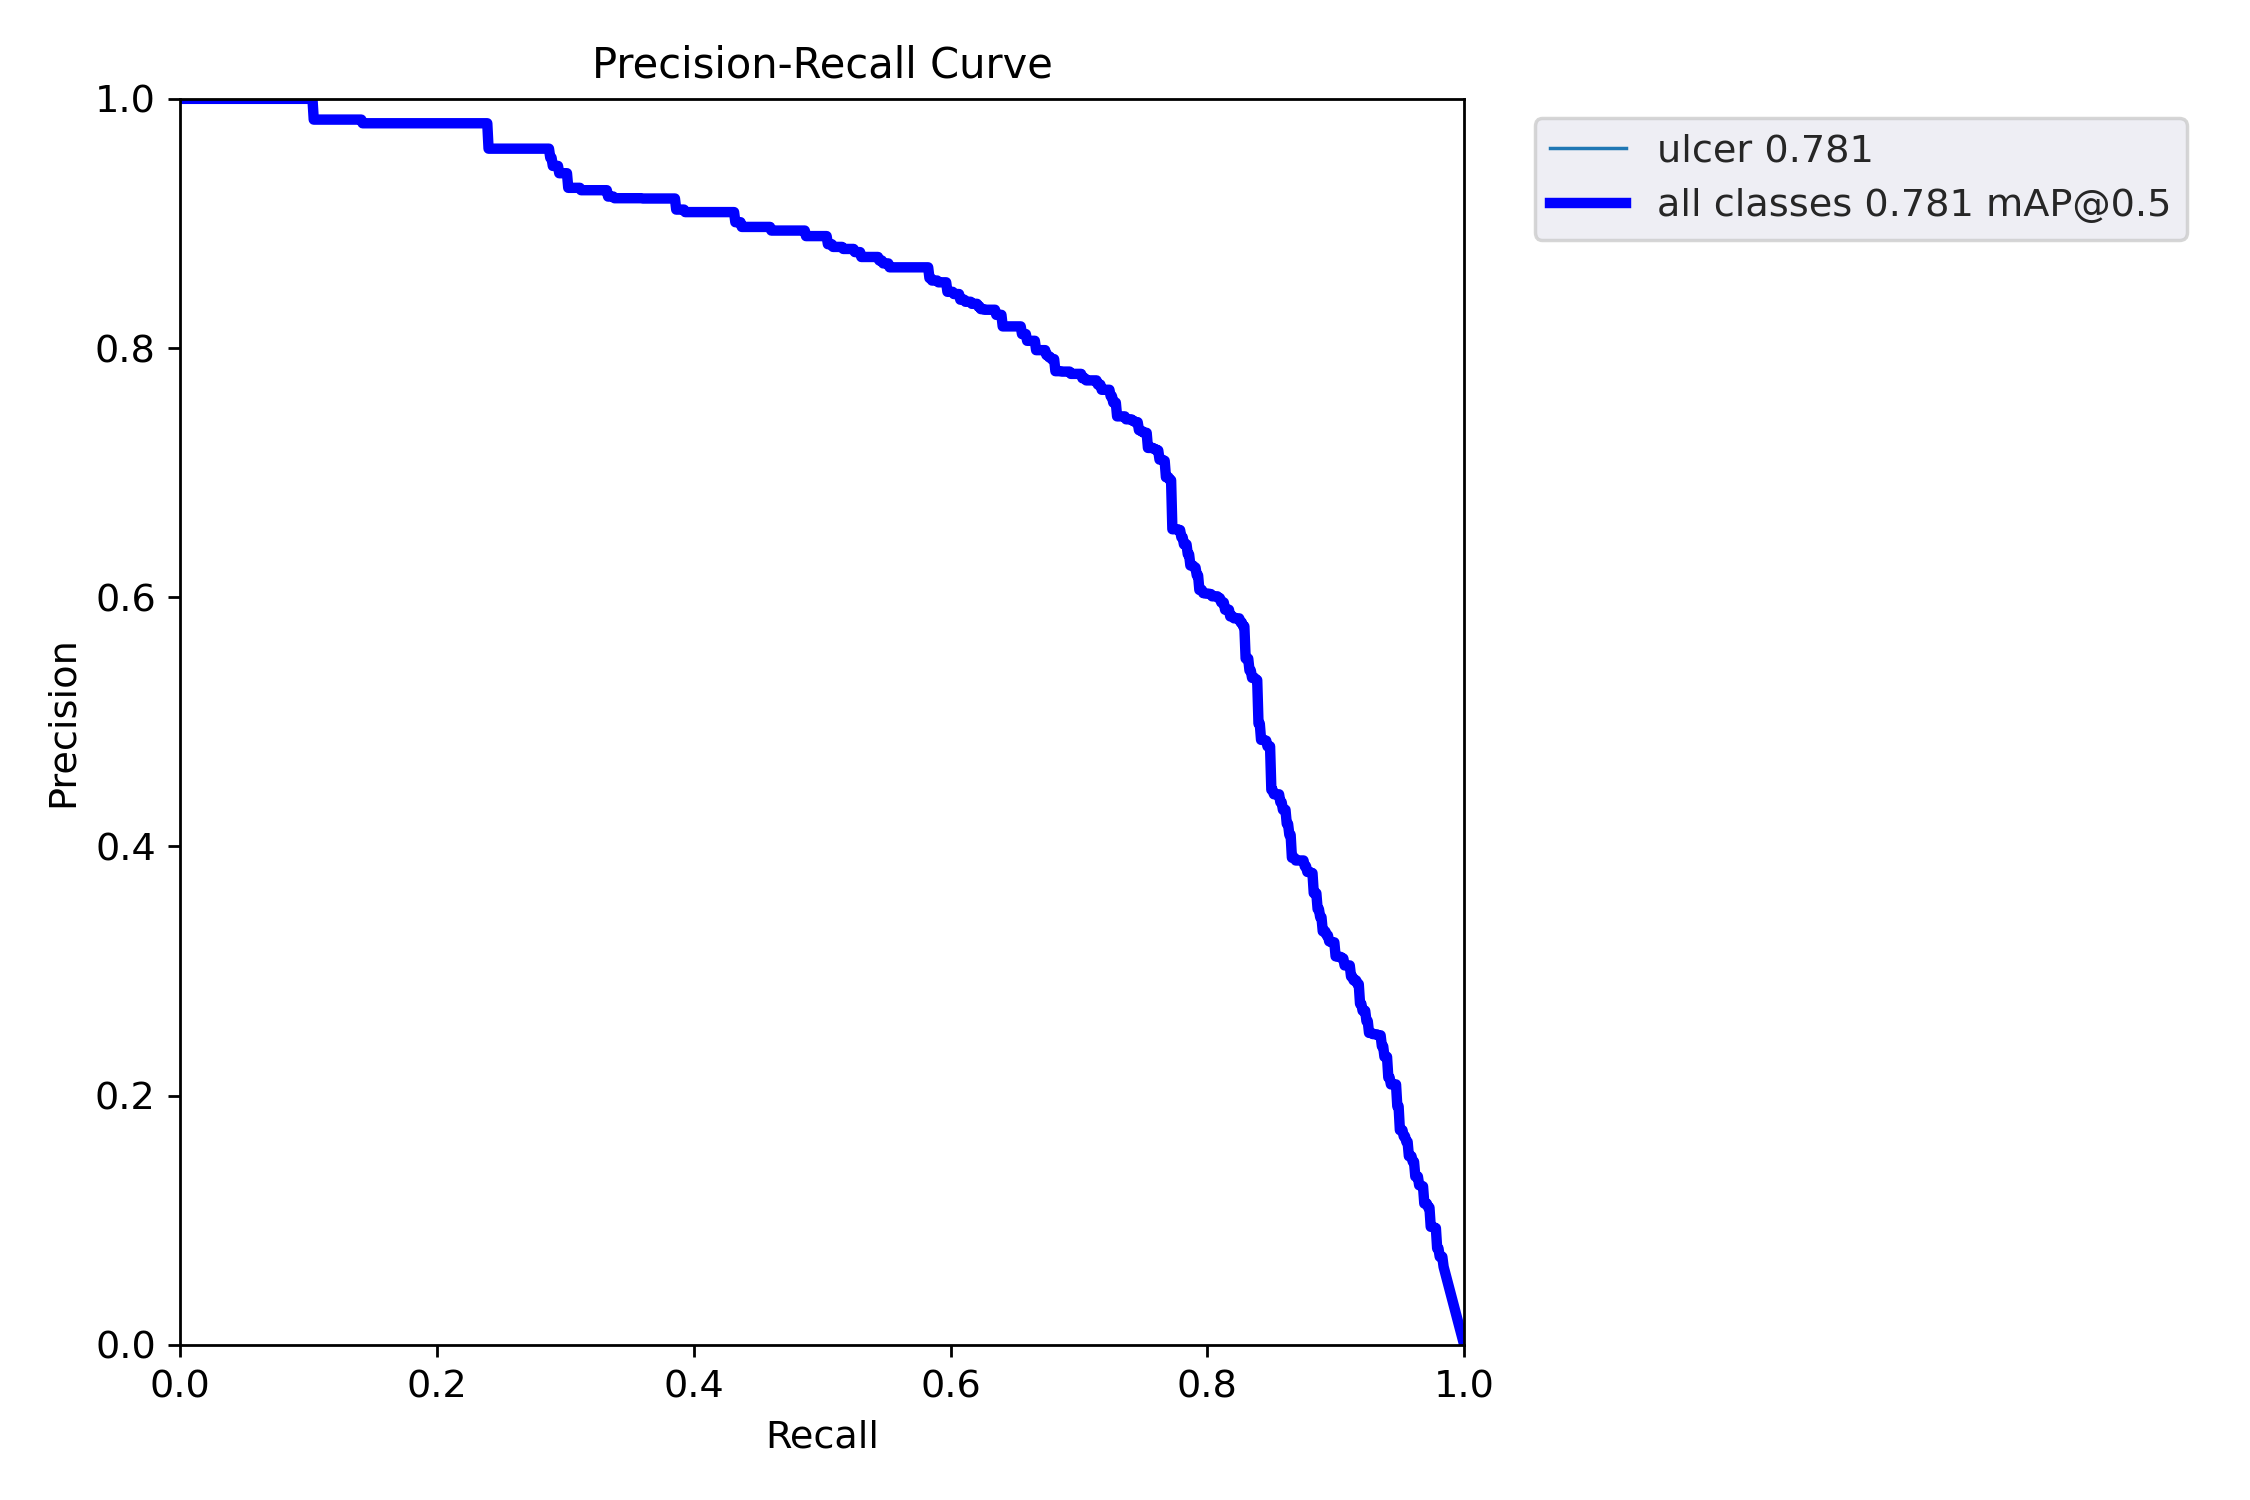

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/PR_curve.png", width=1000)

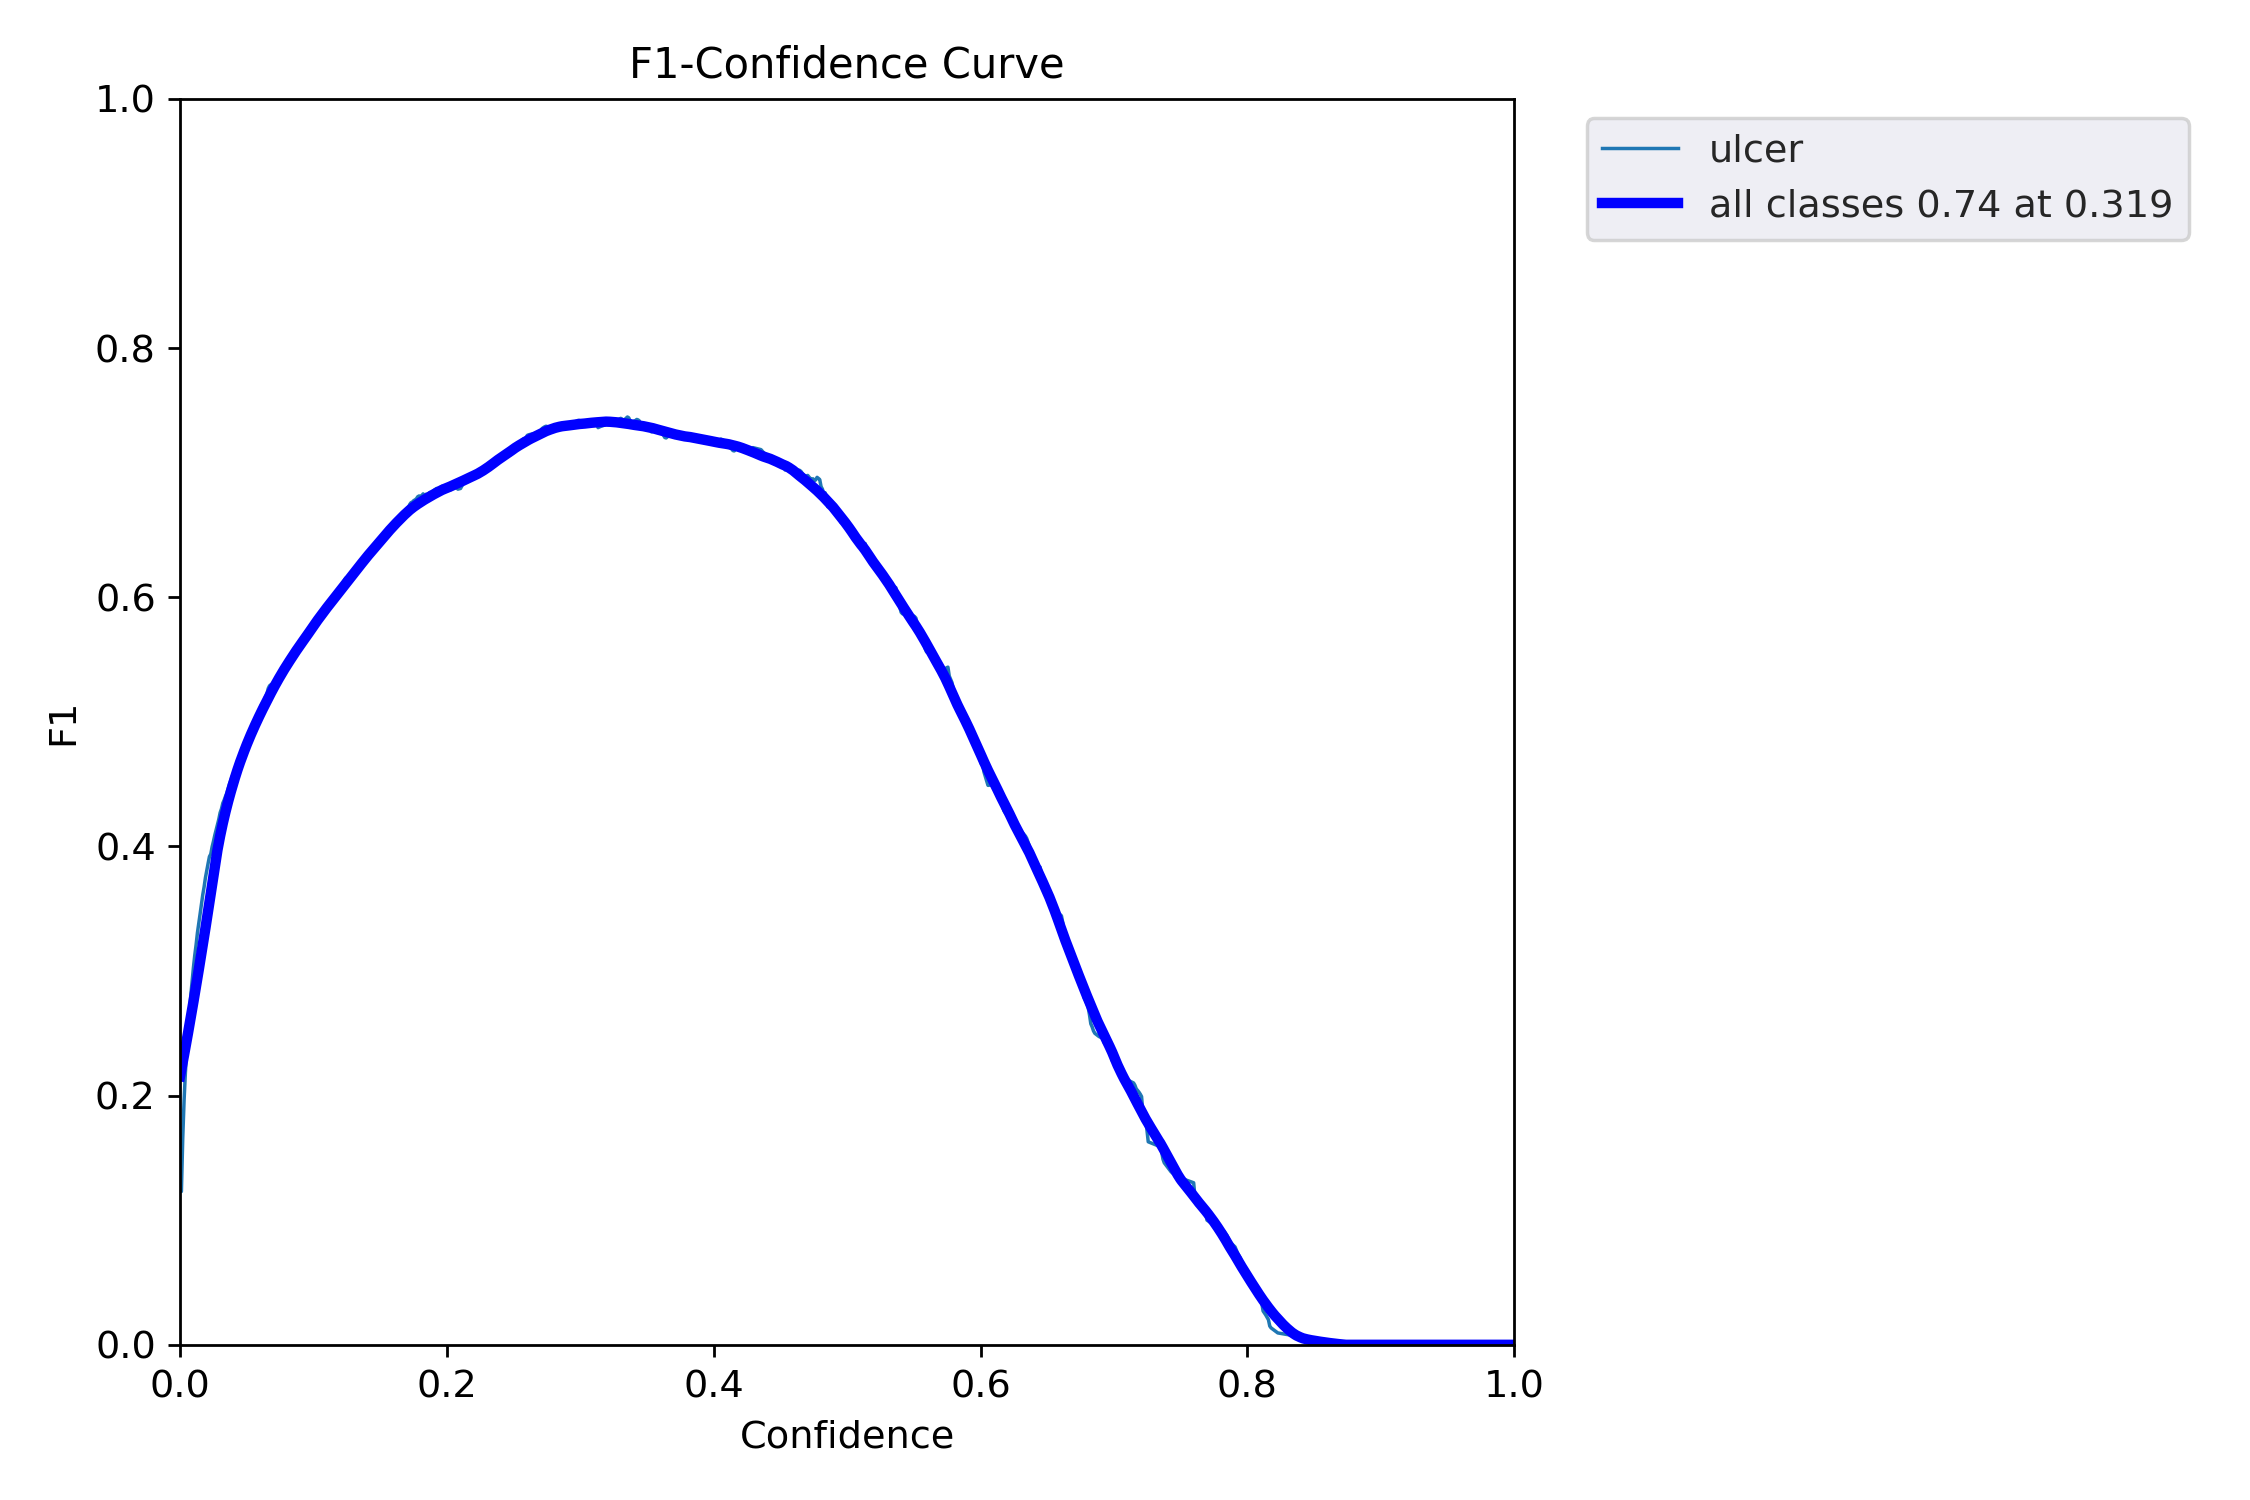

In [21]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/F1_curve.png", width=1000)

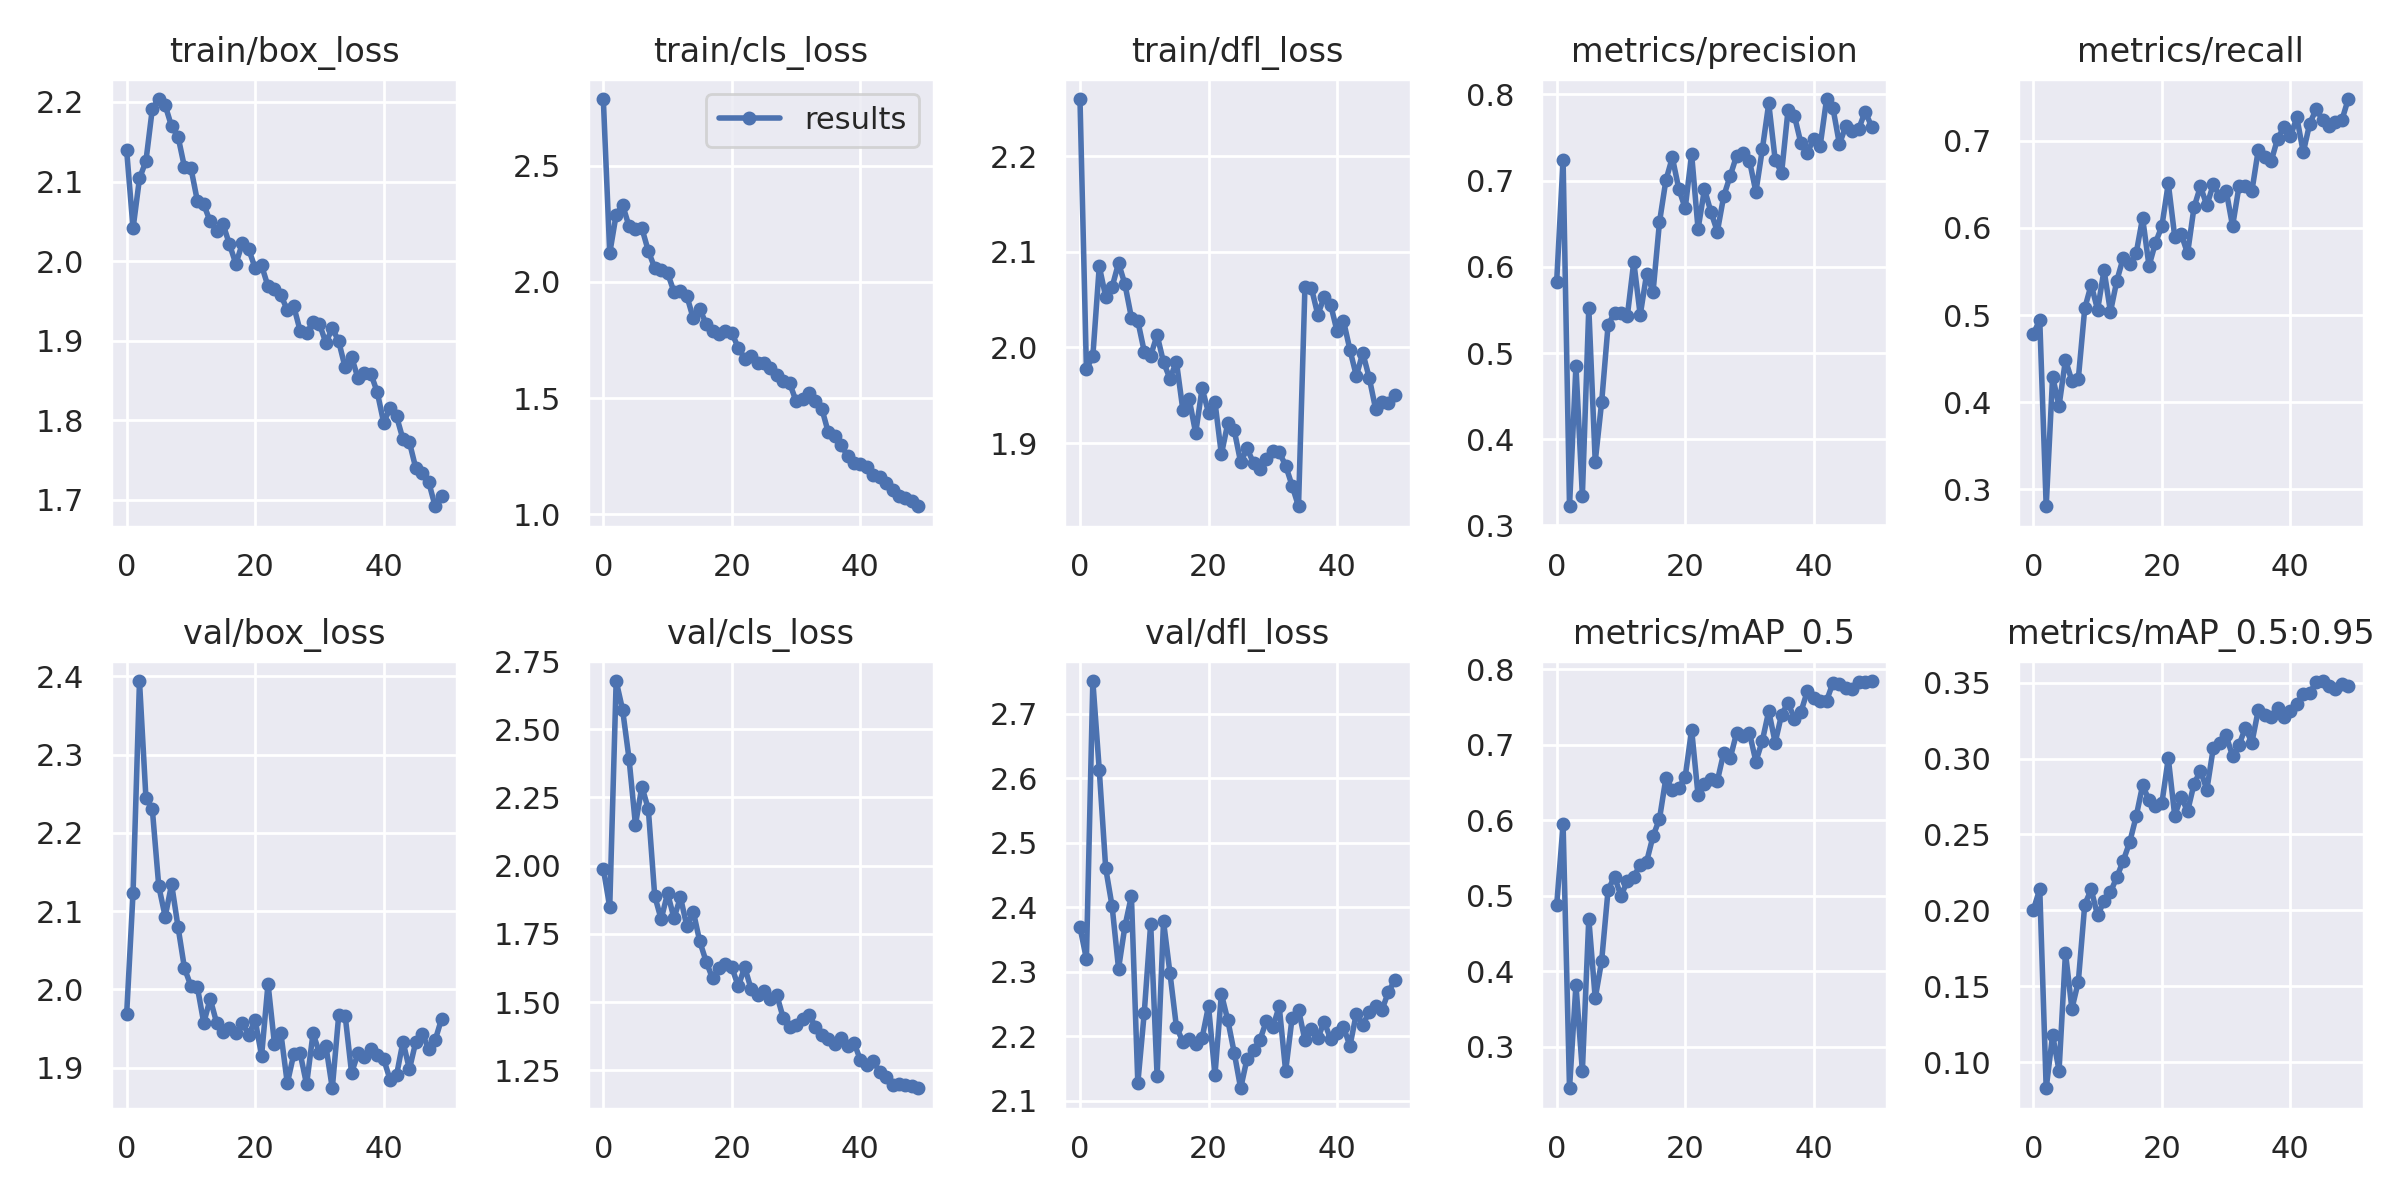

In [22]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

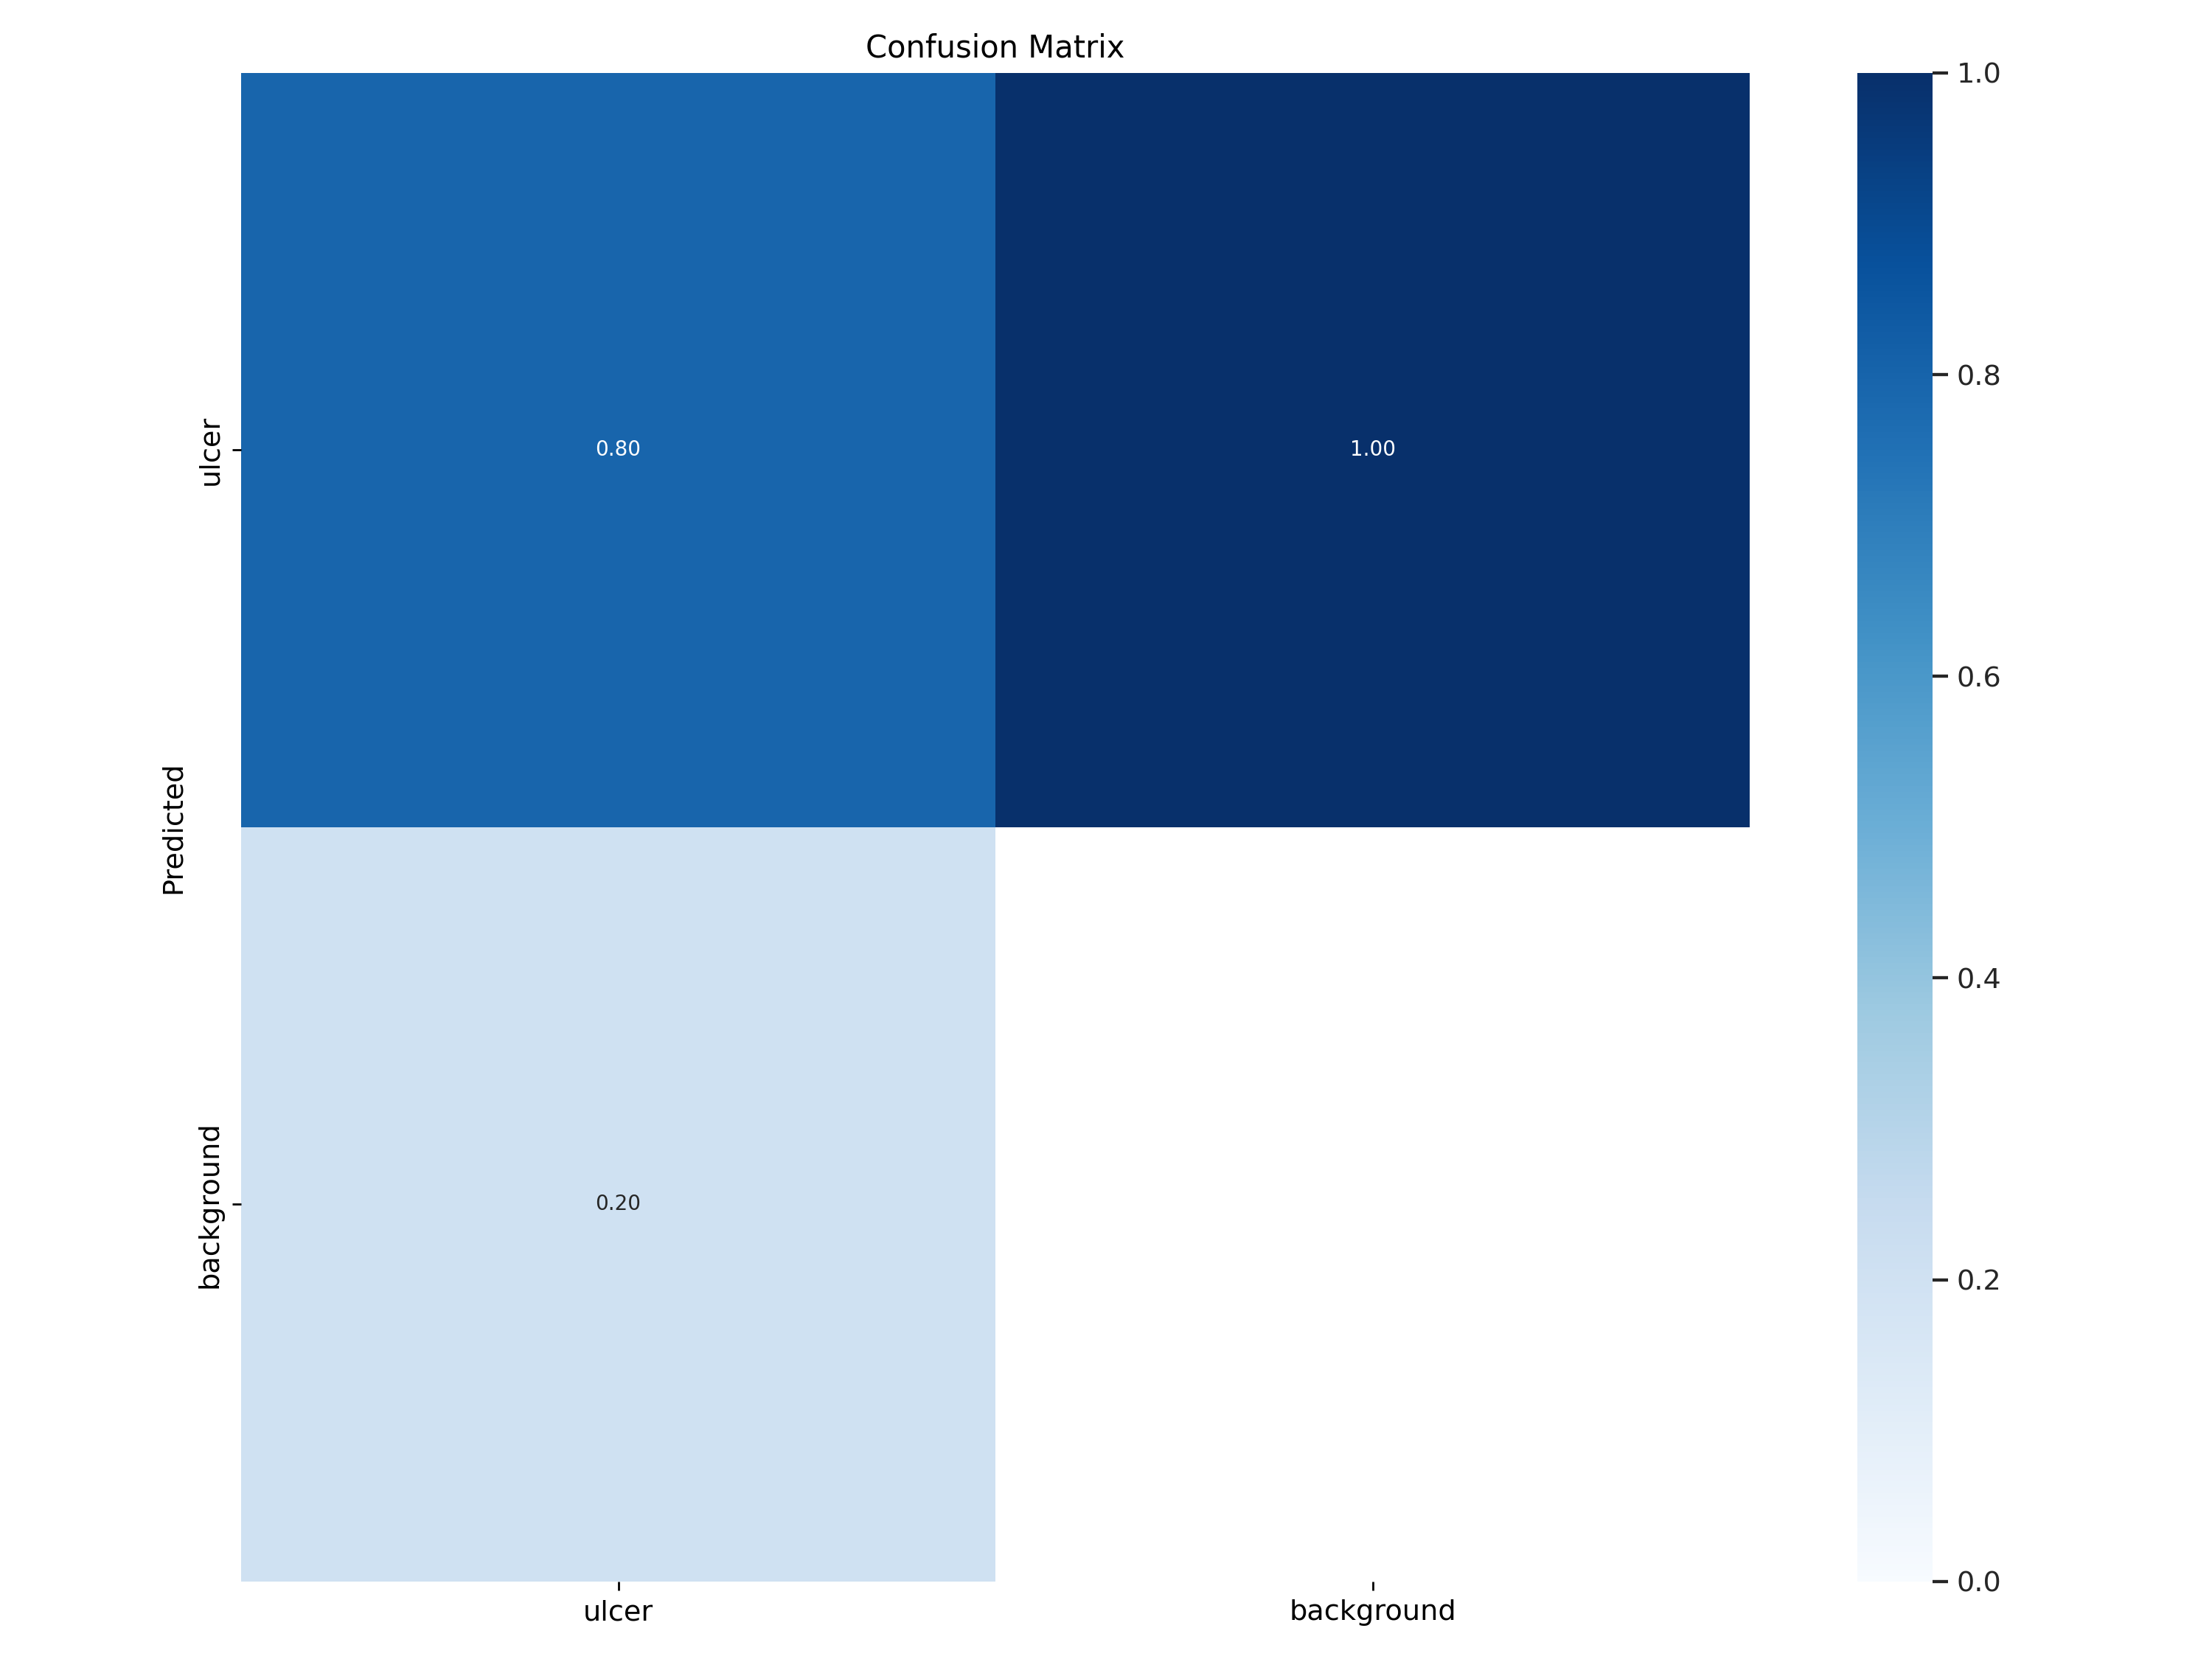

In [23]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

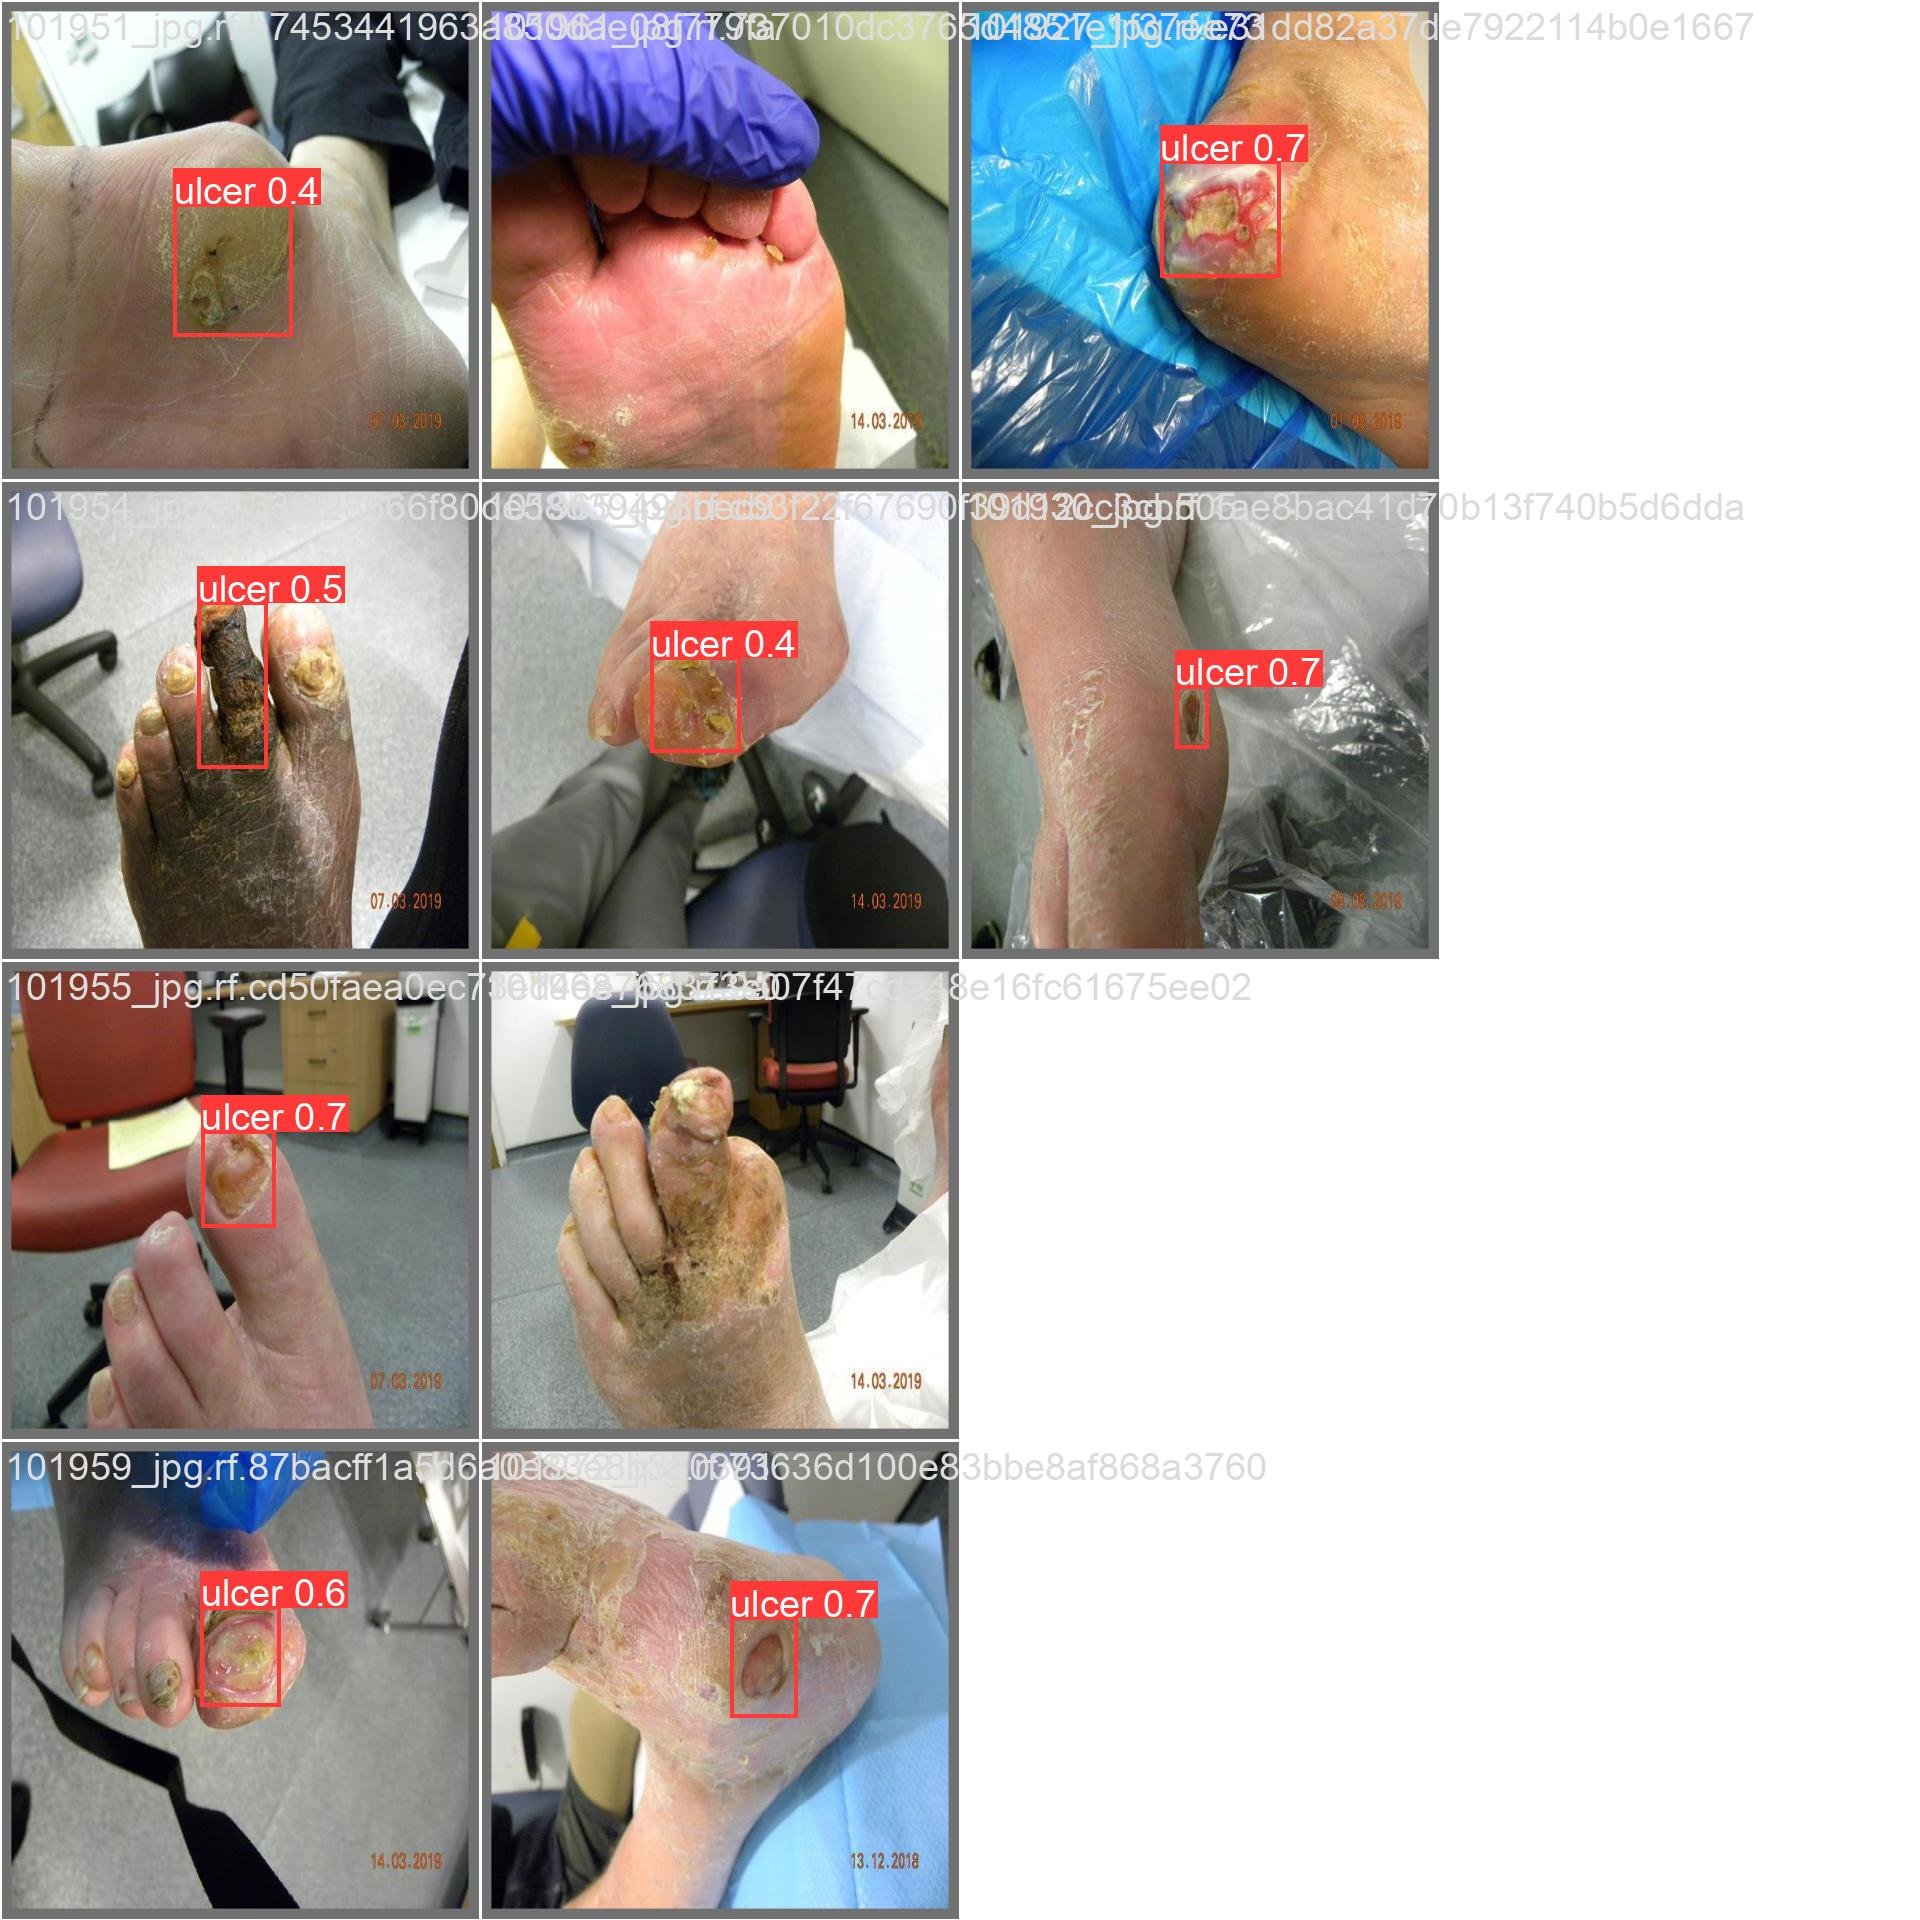

In [24]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

### Validate Custom model- Yolov9 Gelan-e

In [25]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 5 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/kaggle/working/yolov9
val: data=/kaggle/working/yolov9/DFU-1/data.yaml, weights=['/kaggle/working/yolov9/runs/train/exp/weights/best.pt'], batch_size=5, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

/kaggle/working/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This lim

In [26]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/kaggle/working/yolov9/runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov9/DFU-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

/kaggle/working/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a futur

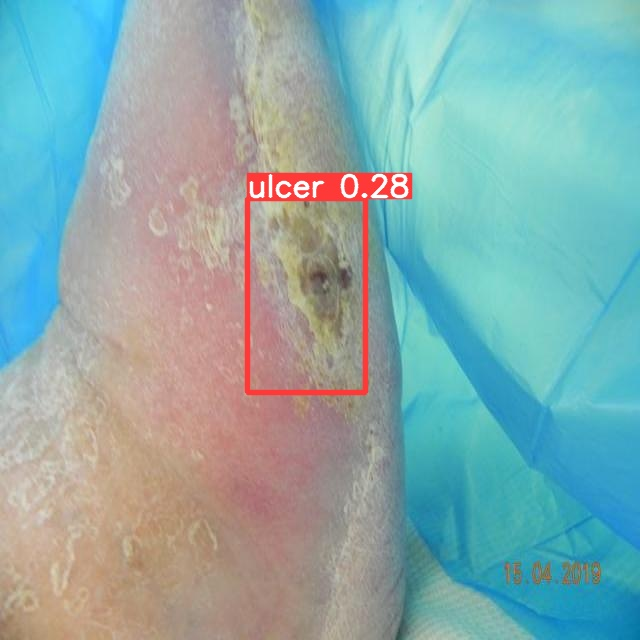

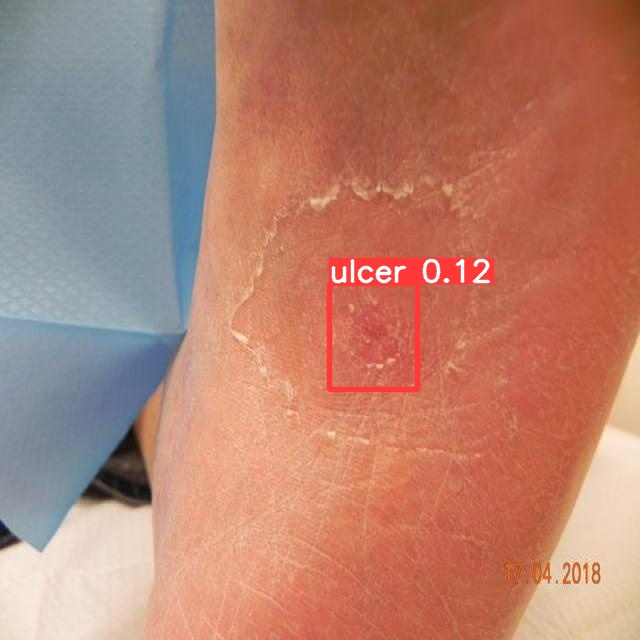

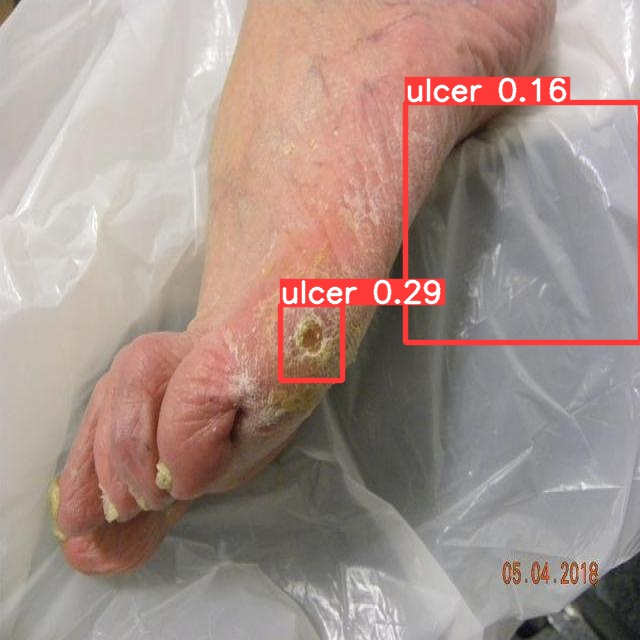

In [28]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))

In [29]:
!ls {HOME}/yolov9/runs/val/exp/

F1_curve.png  confusion_matrix.png   val_batch1_pred.jpg
PR_curve.png  val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png   val_batch0_pred.jpg    val_batch2_pred.jpg
R_curve.png   val_batch1_labels.jpg


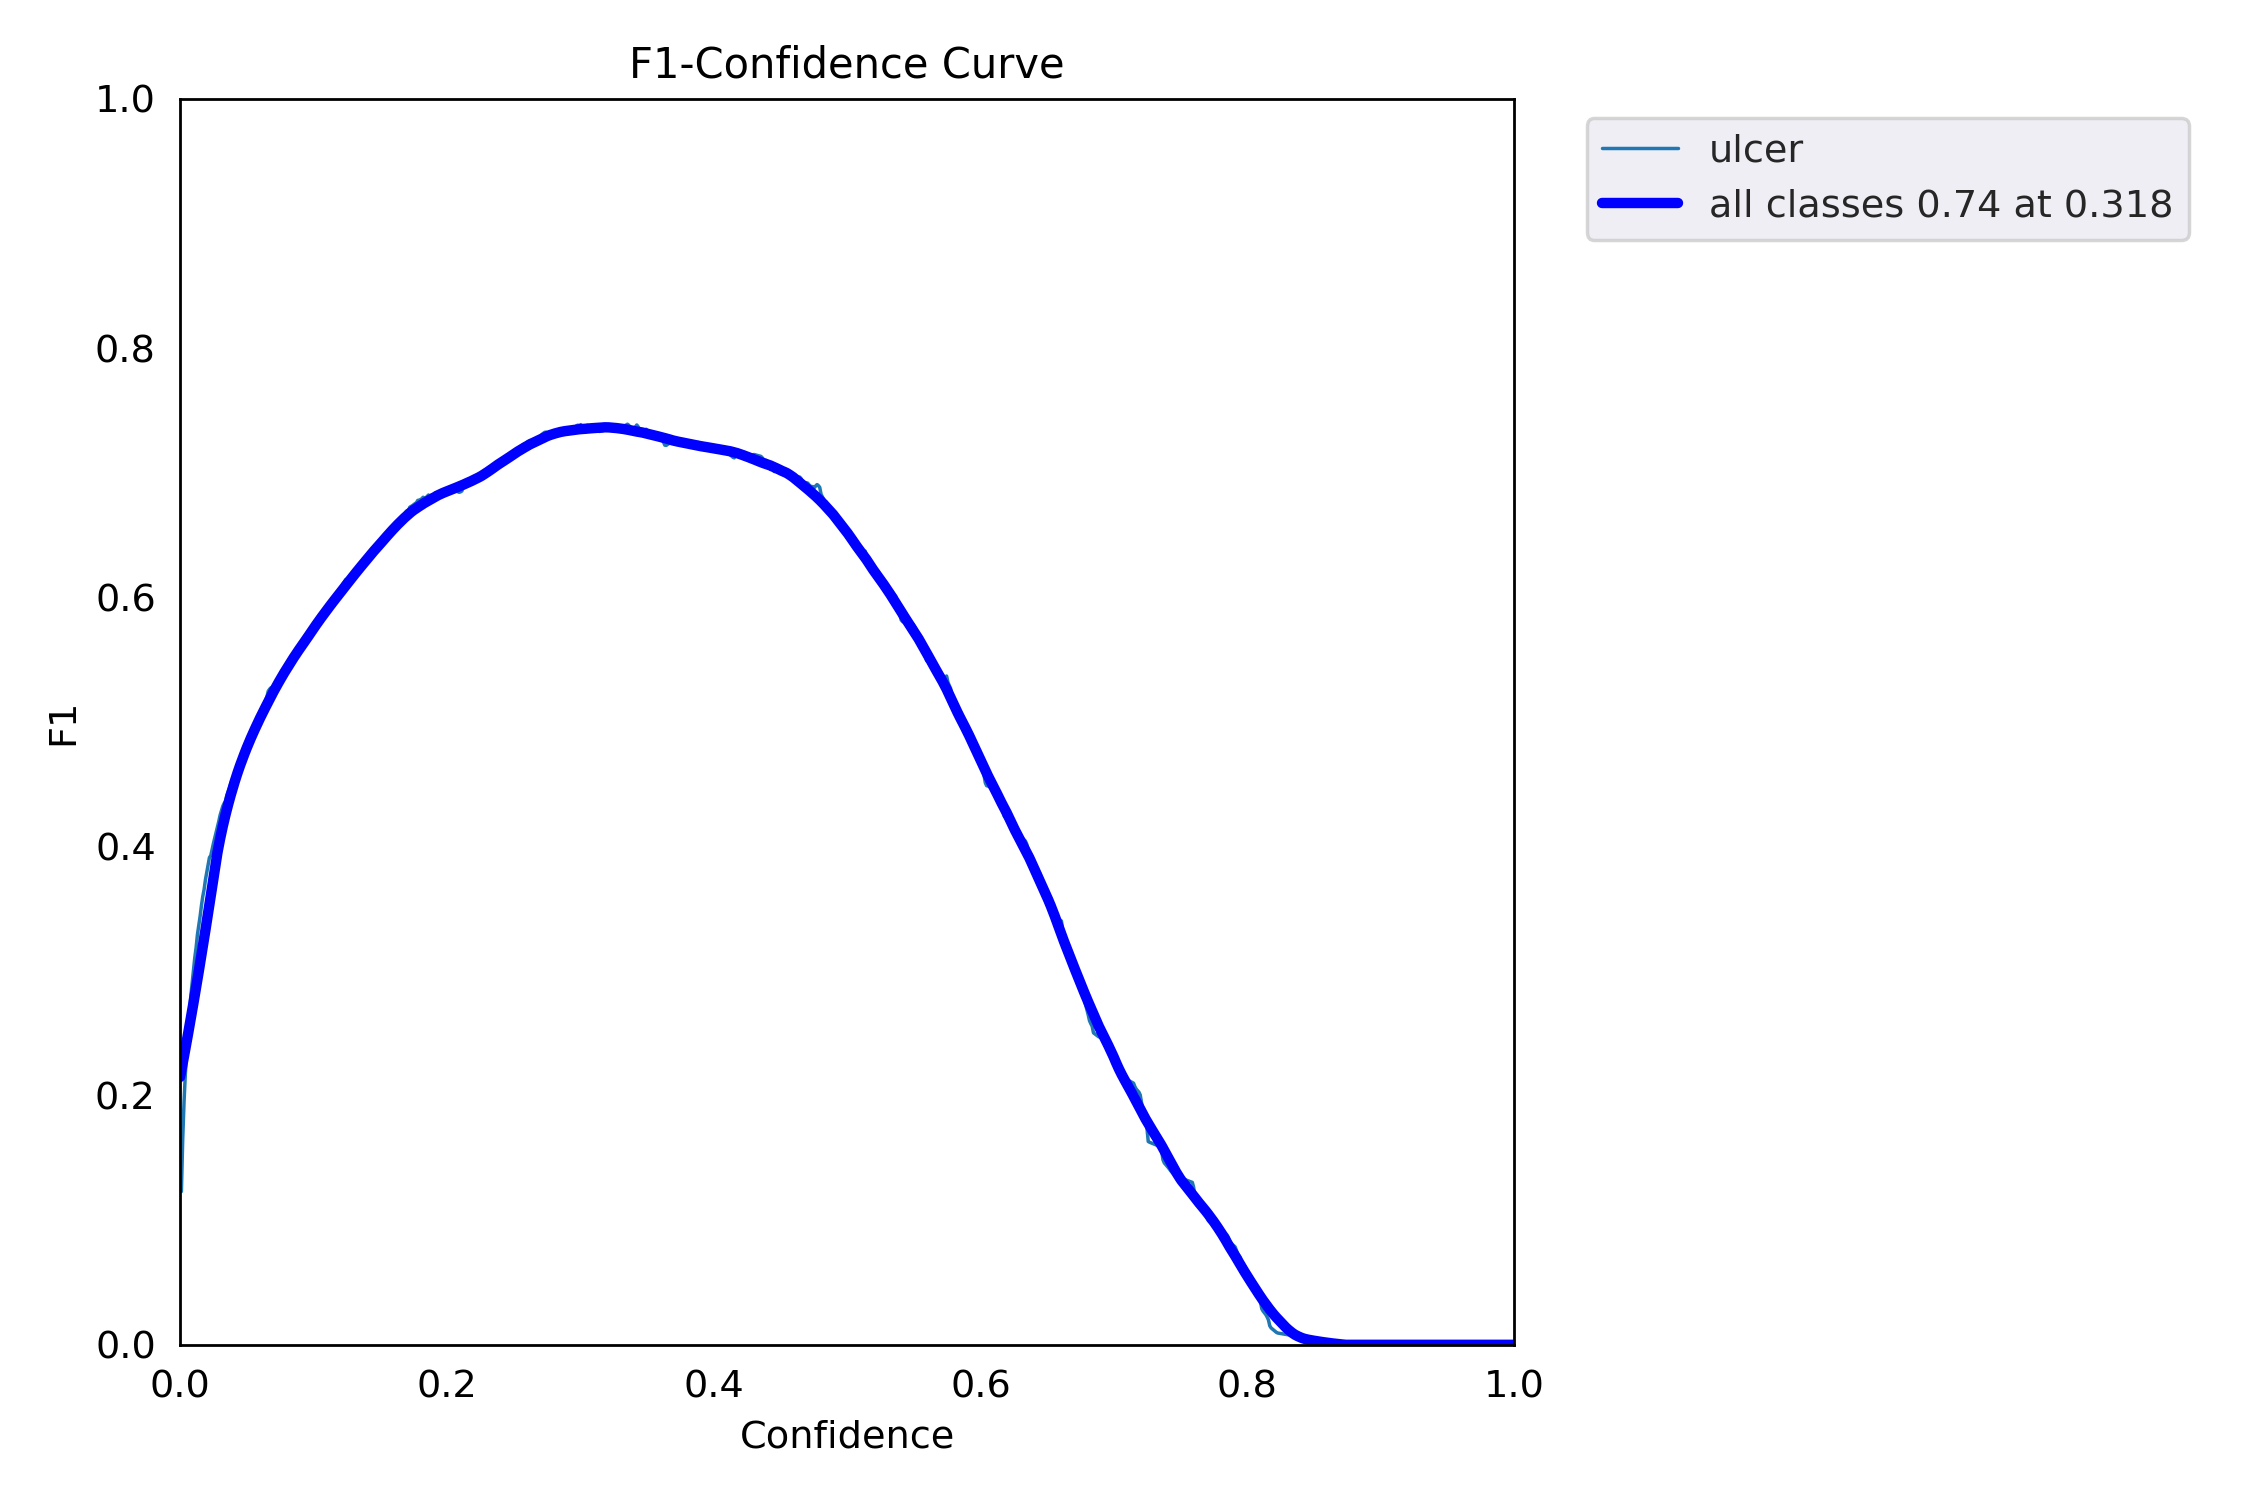

In [31]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/F1_curve.png", width=1000)

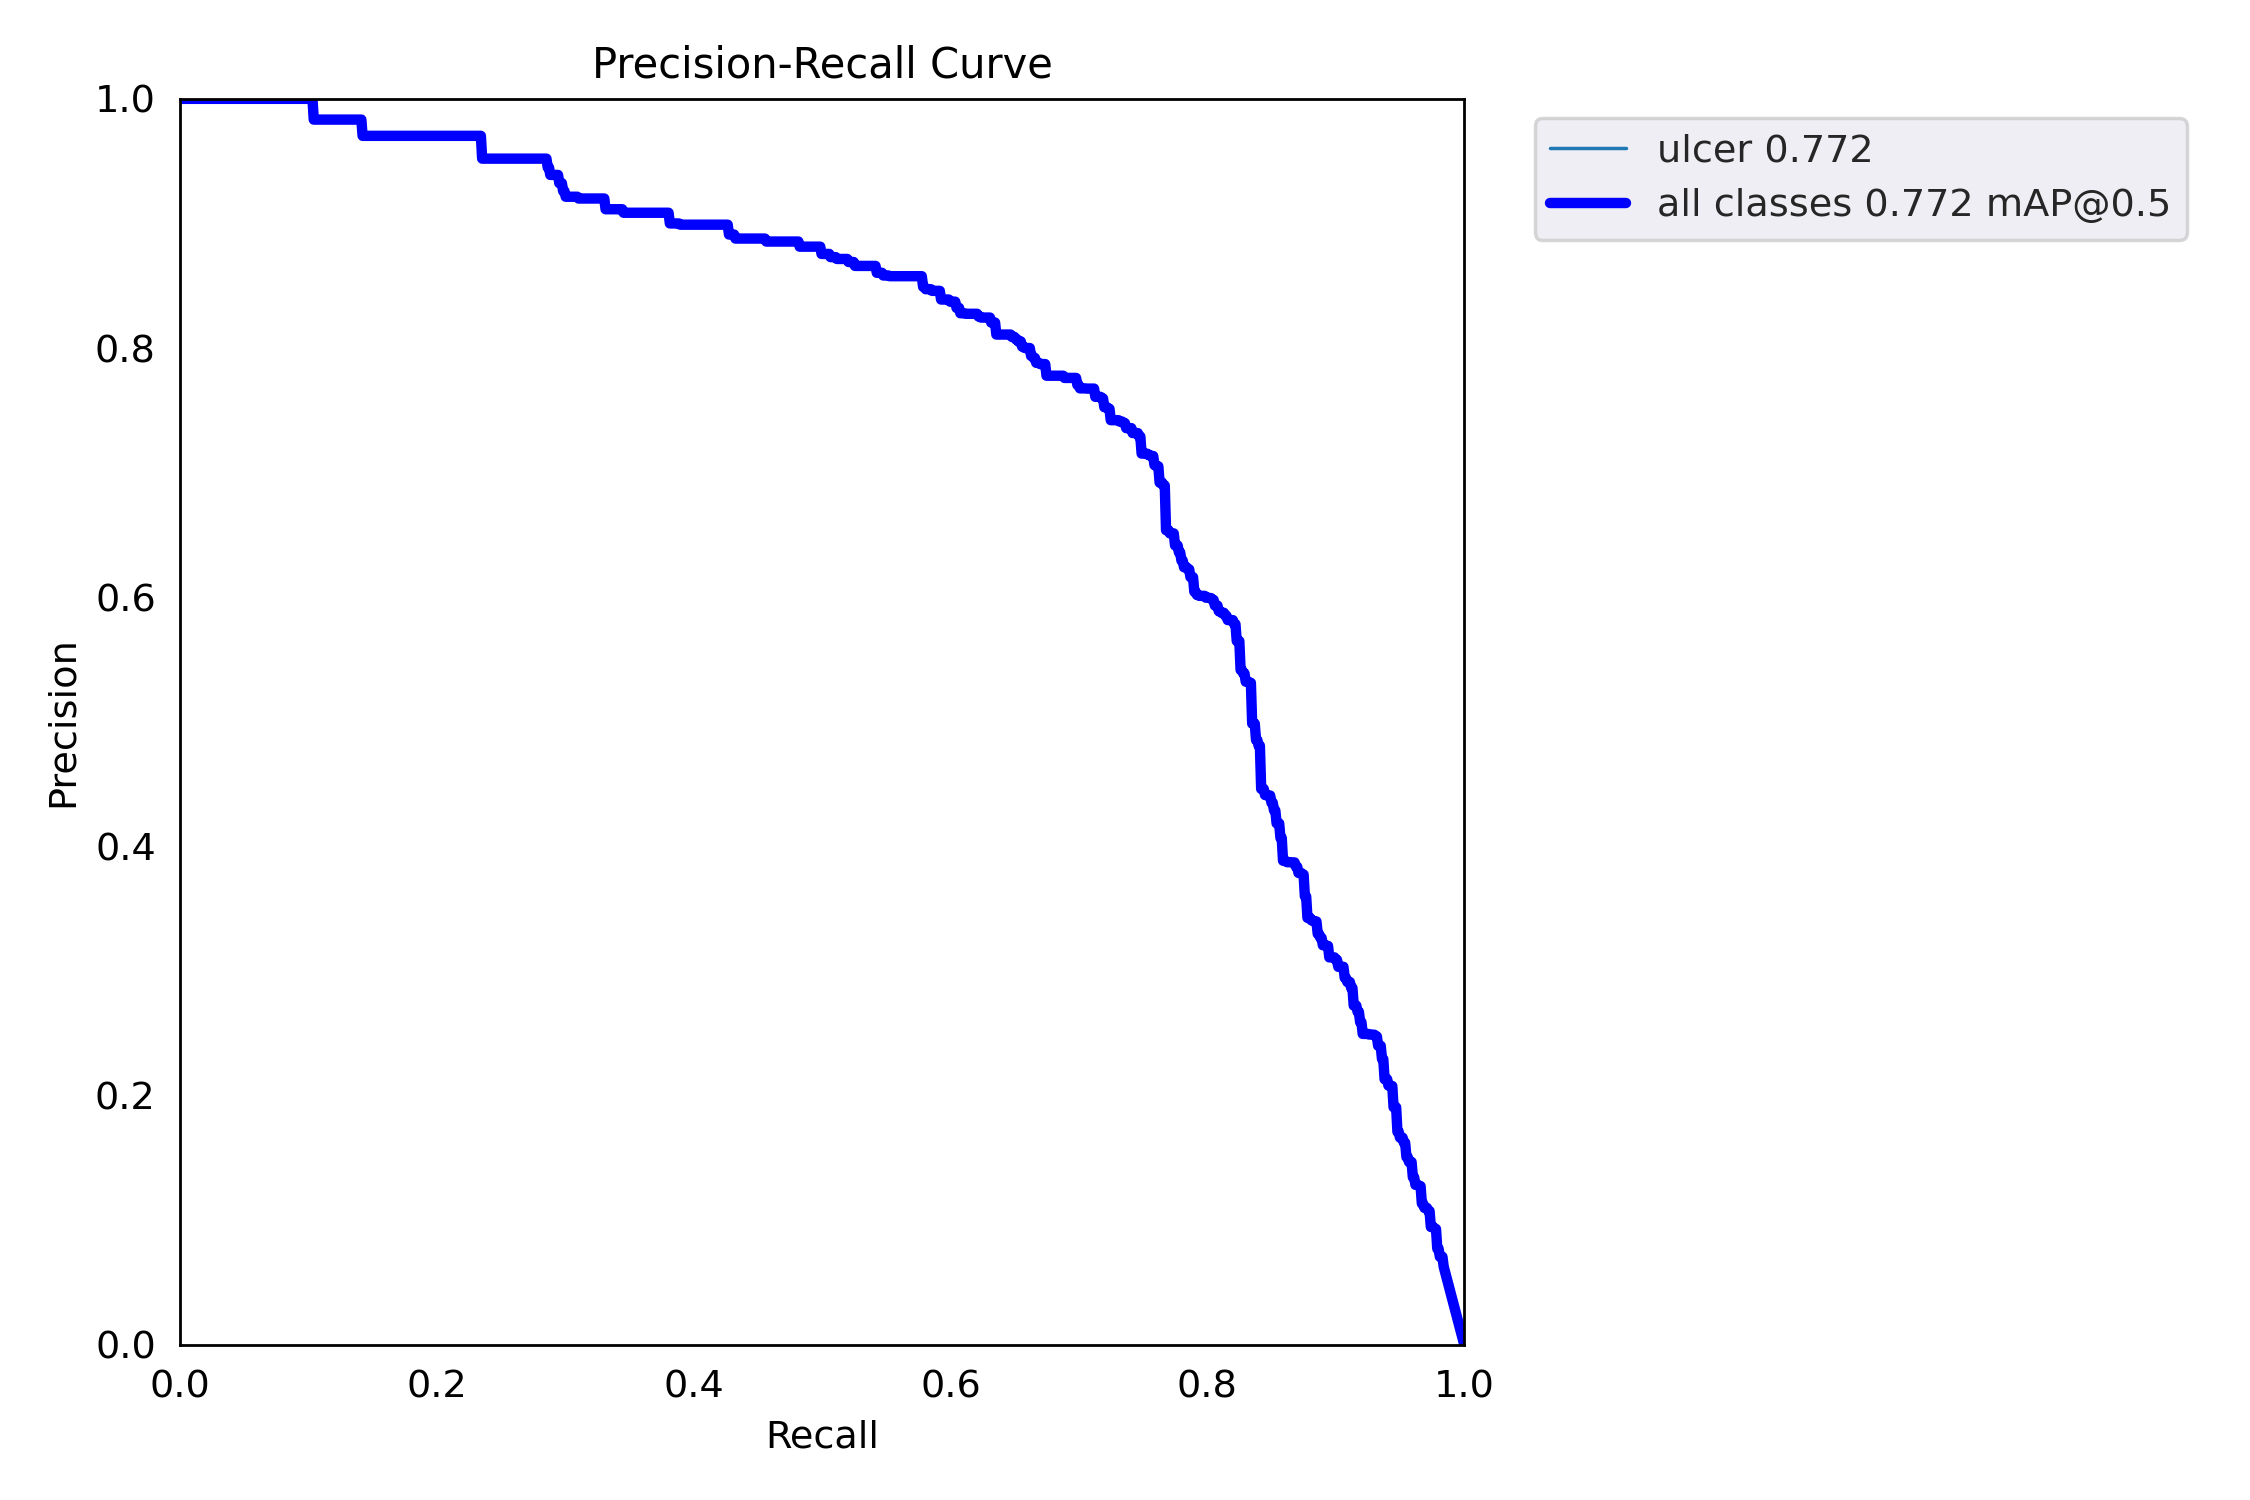

In [32]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/PR_curve.png", width=1000)

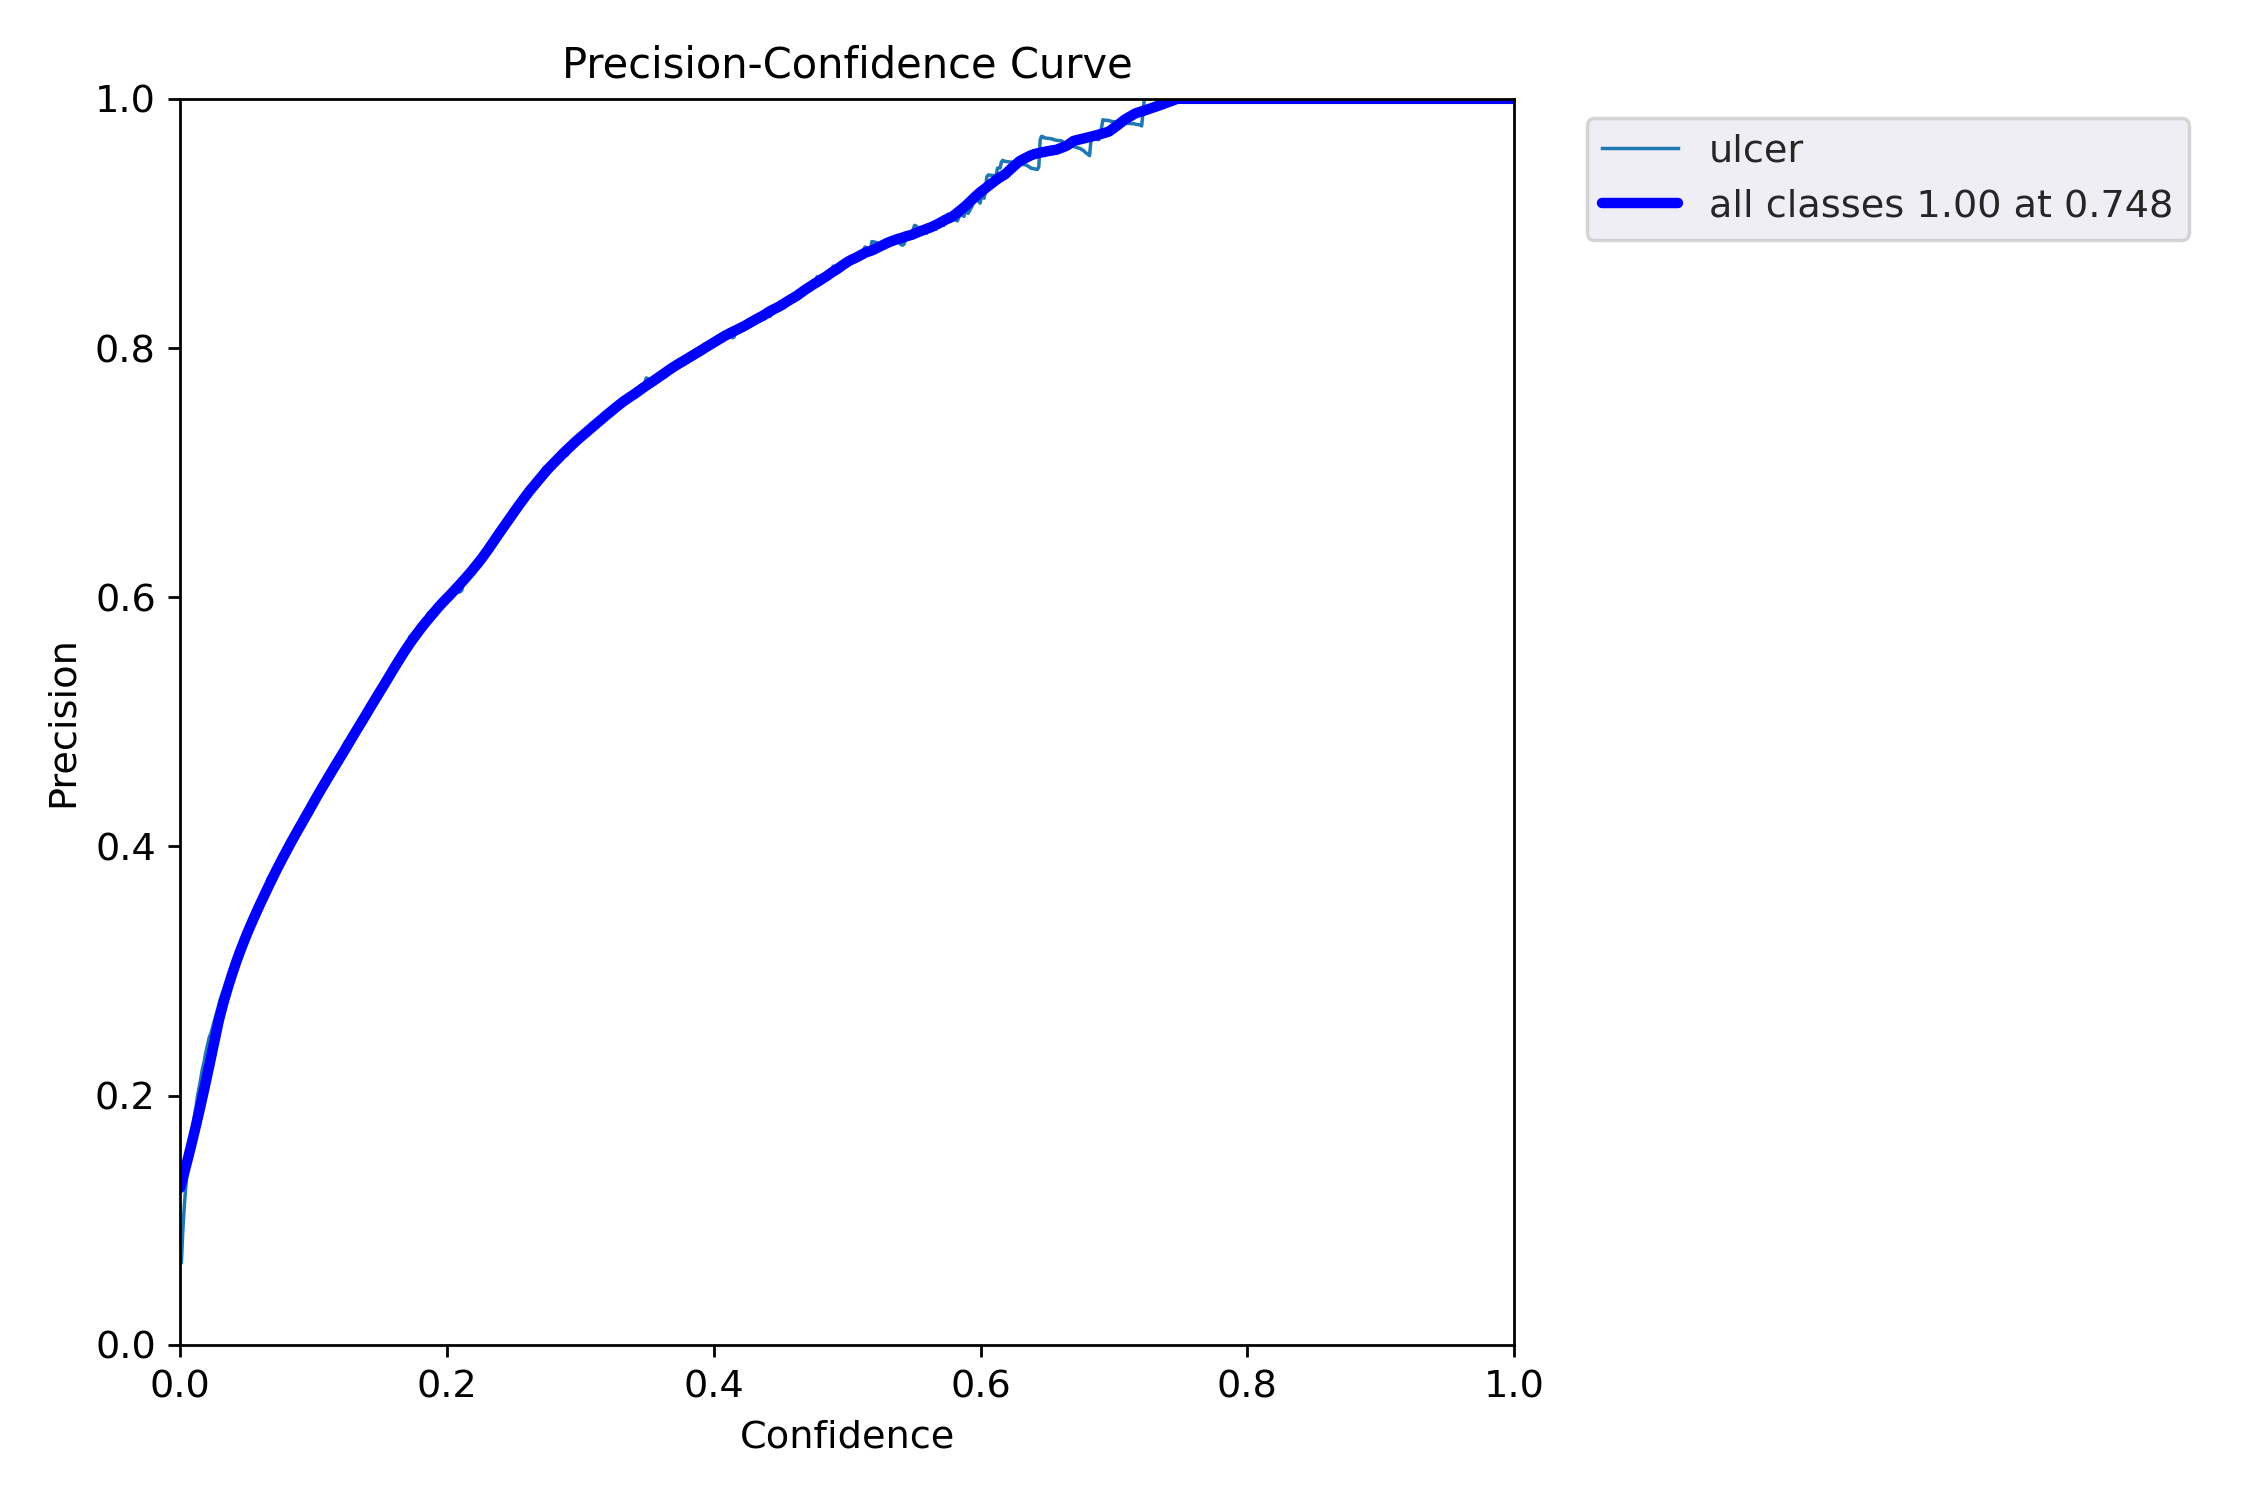

In [33]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/P_curve.png", width=1000)

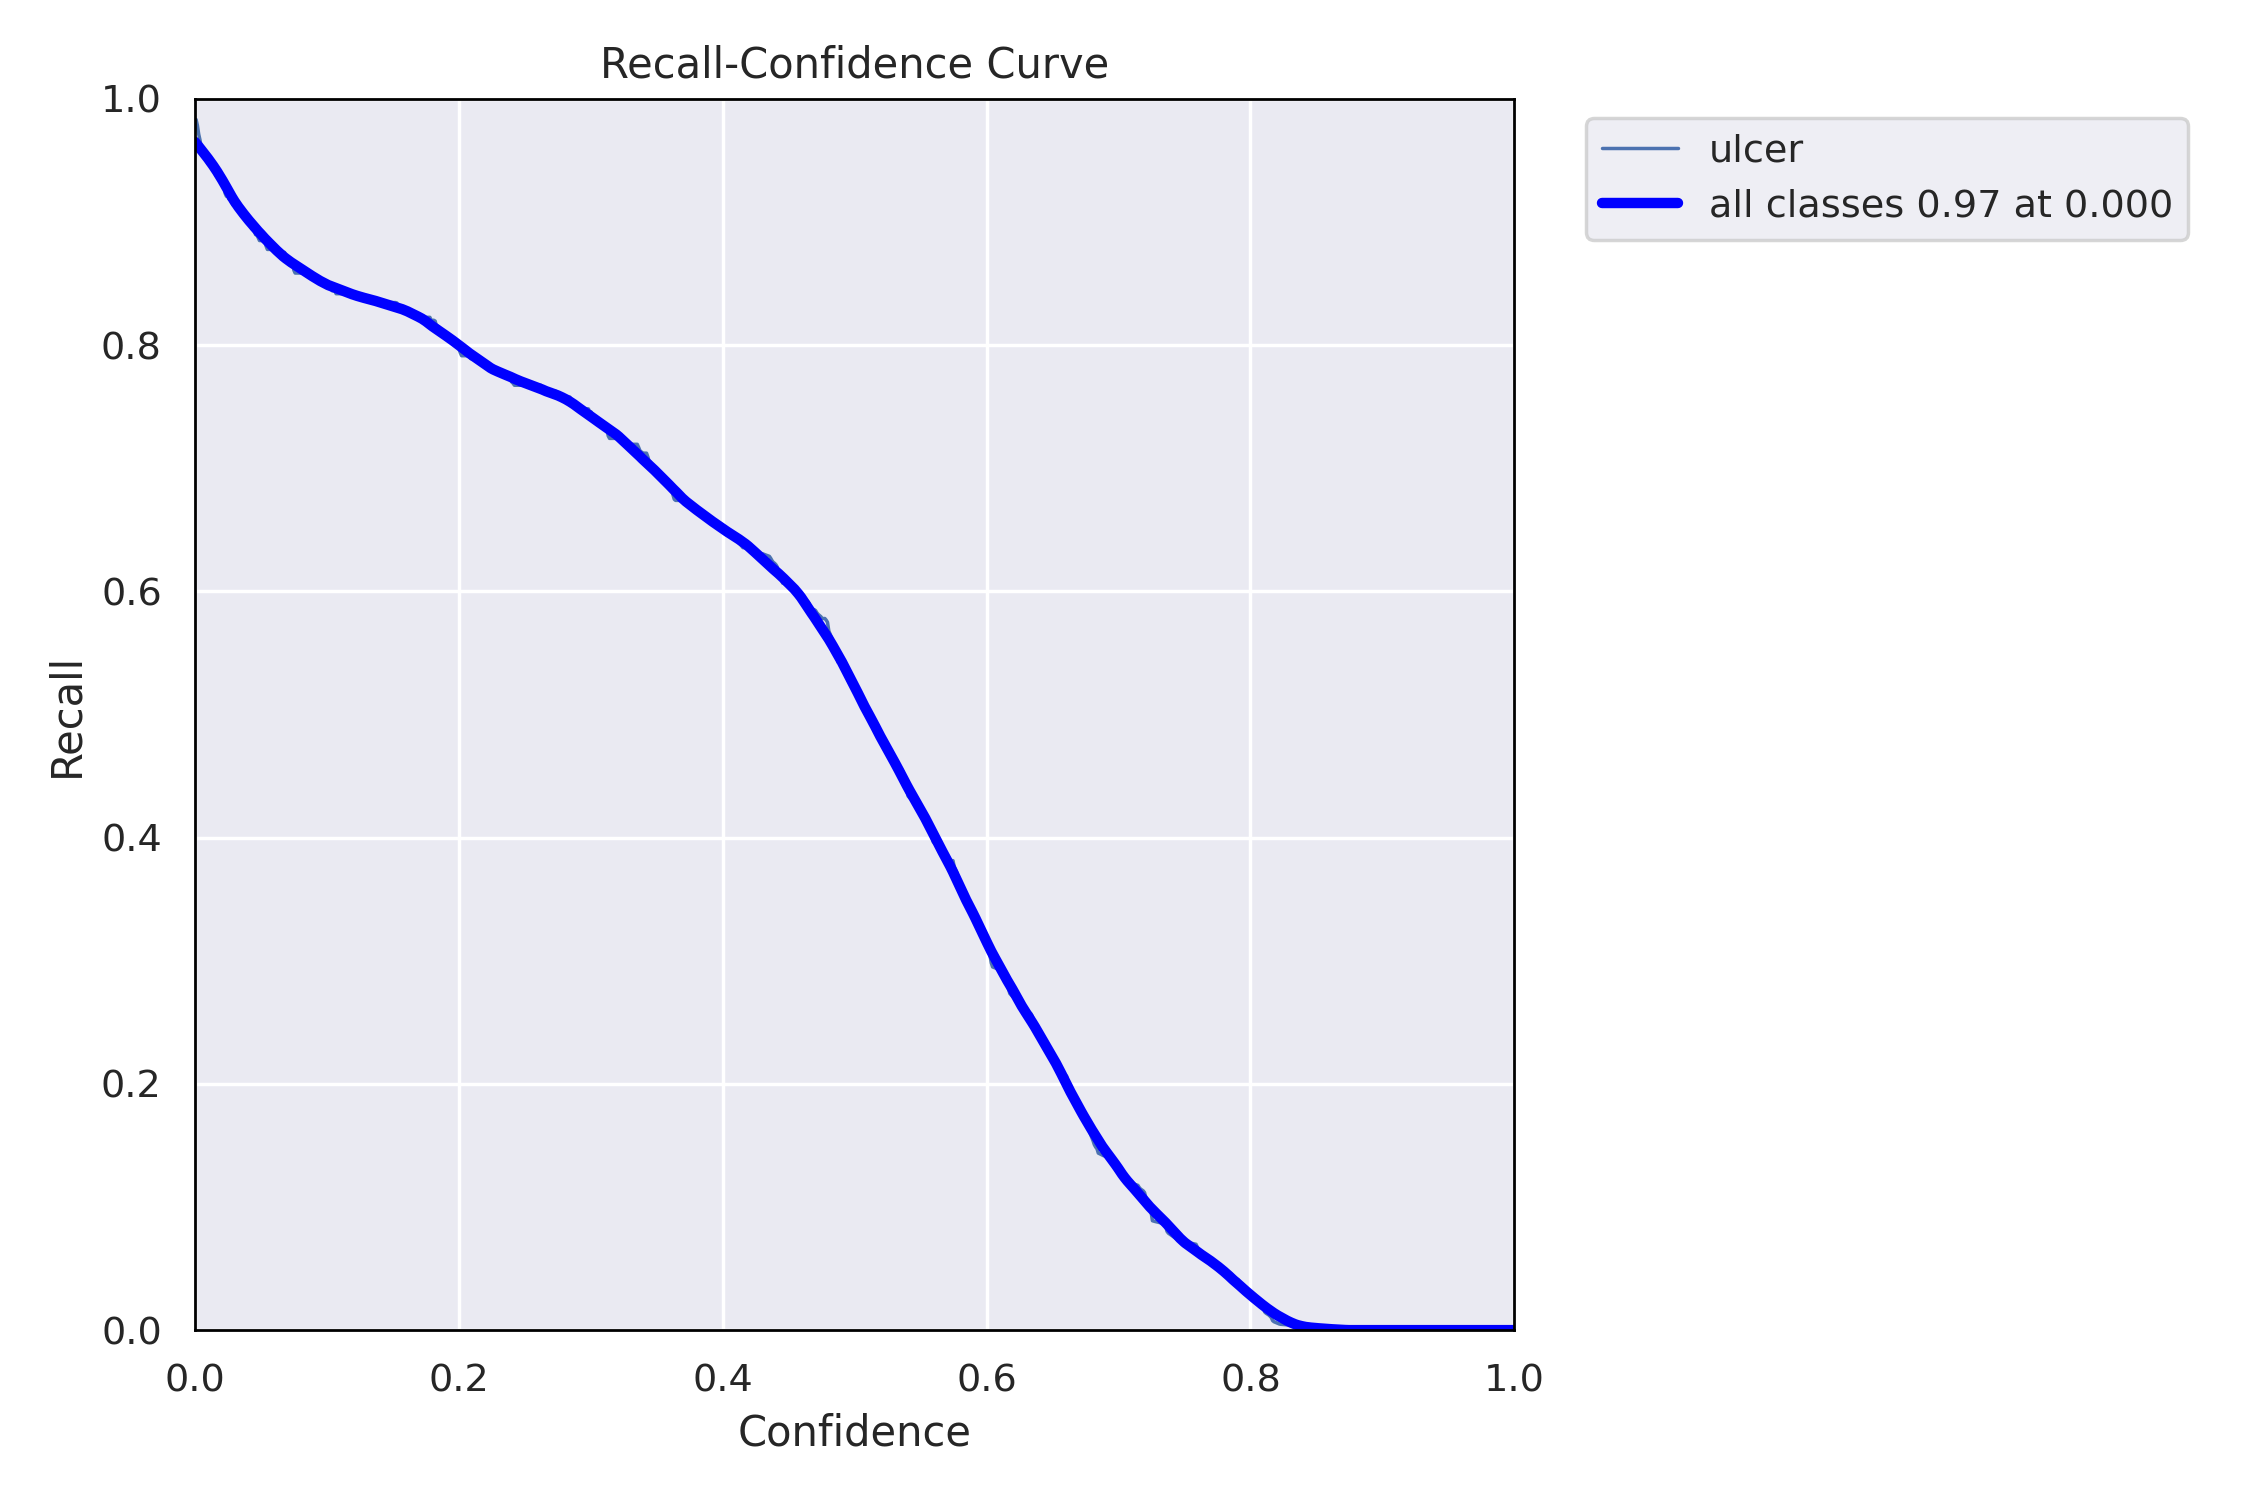

In [34]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/R_curve.png", width=1000)

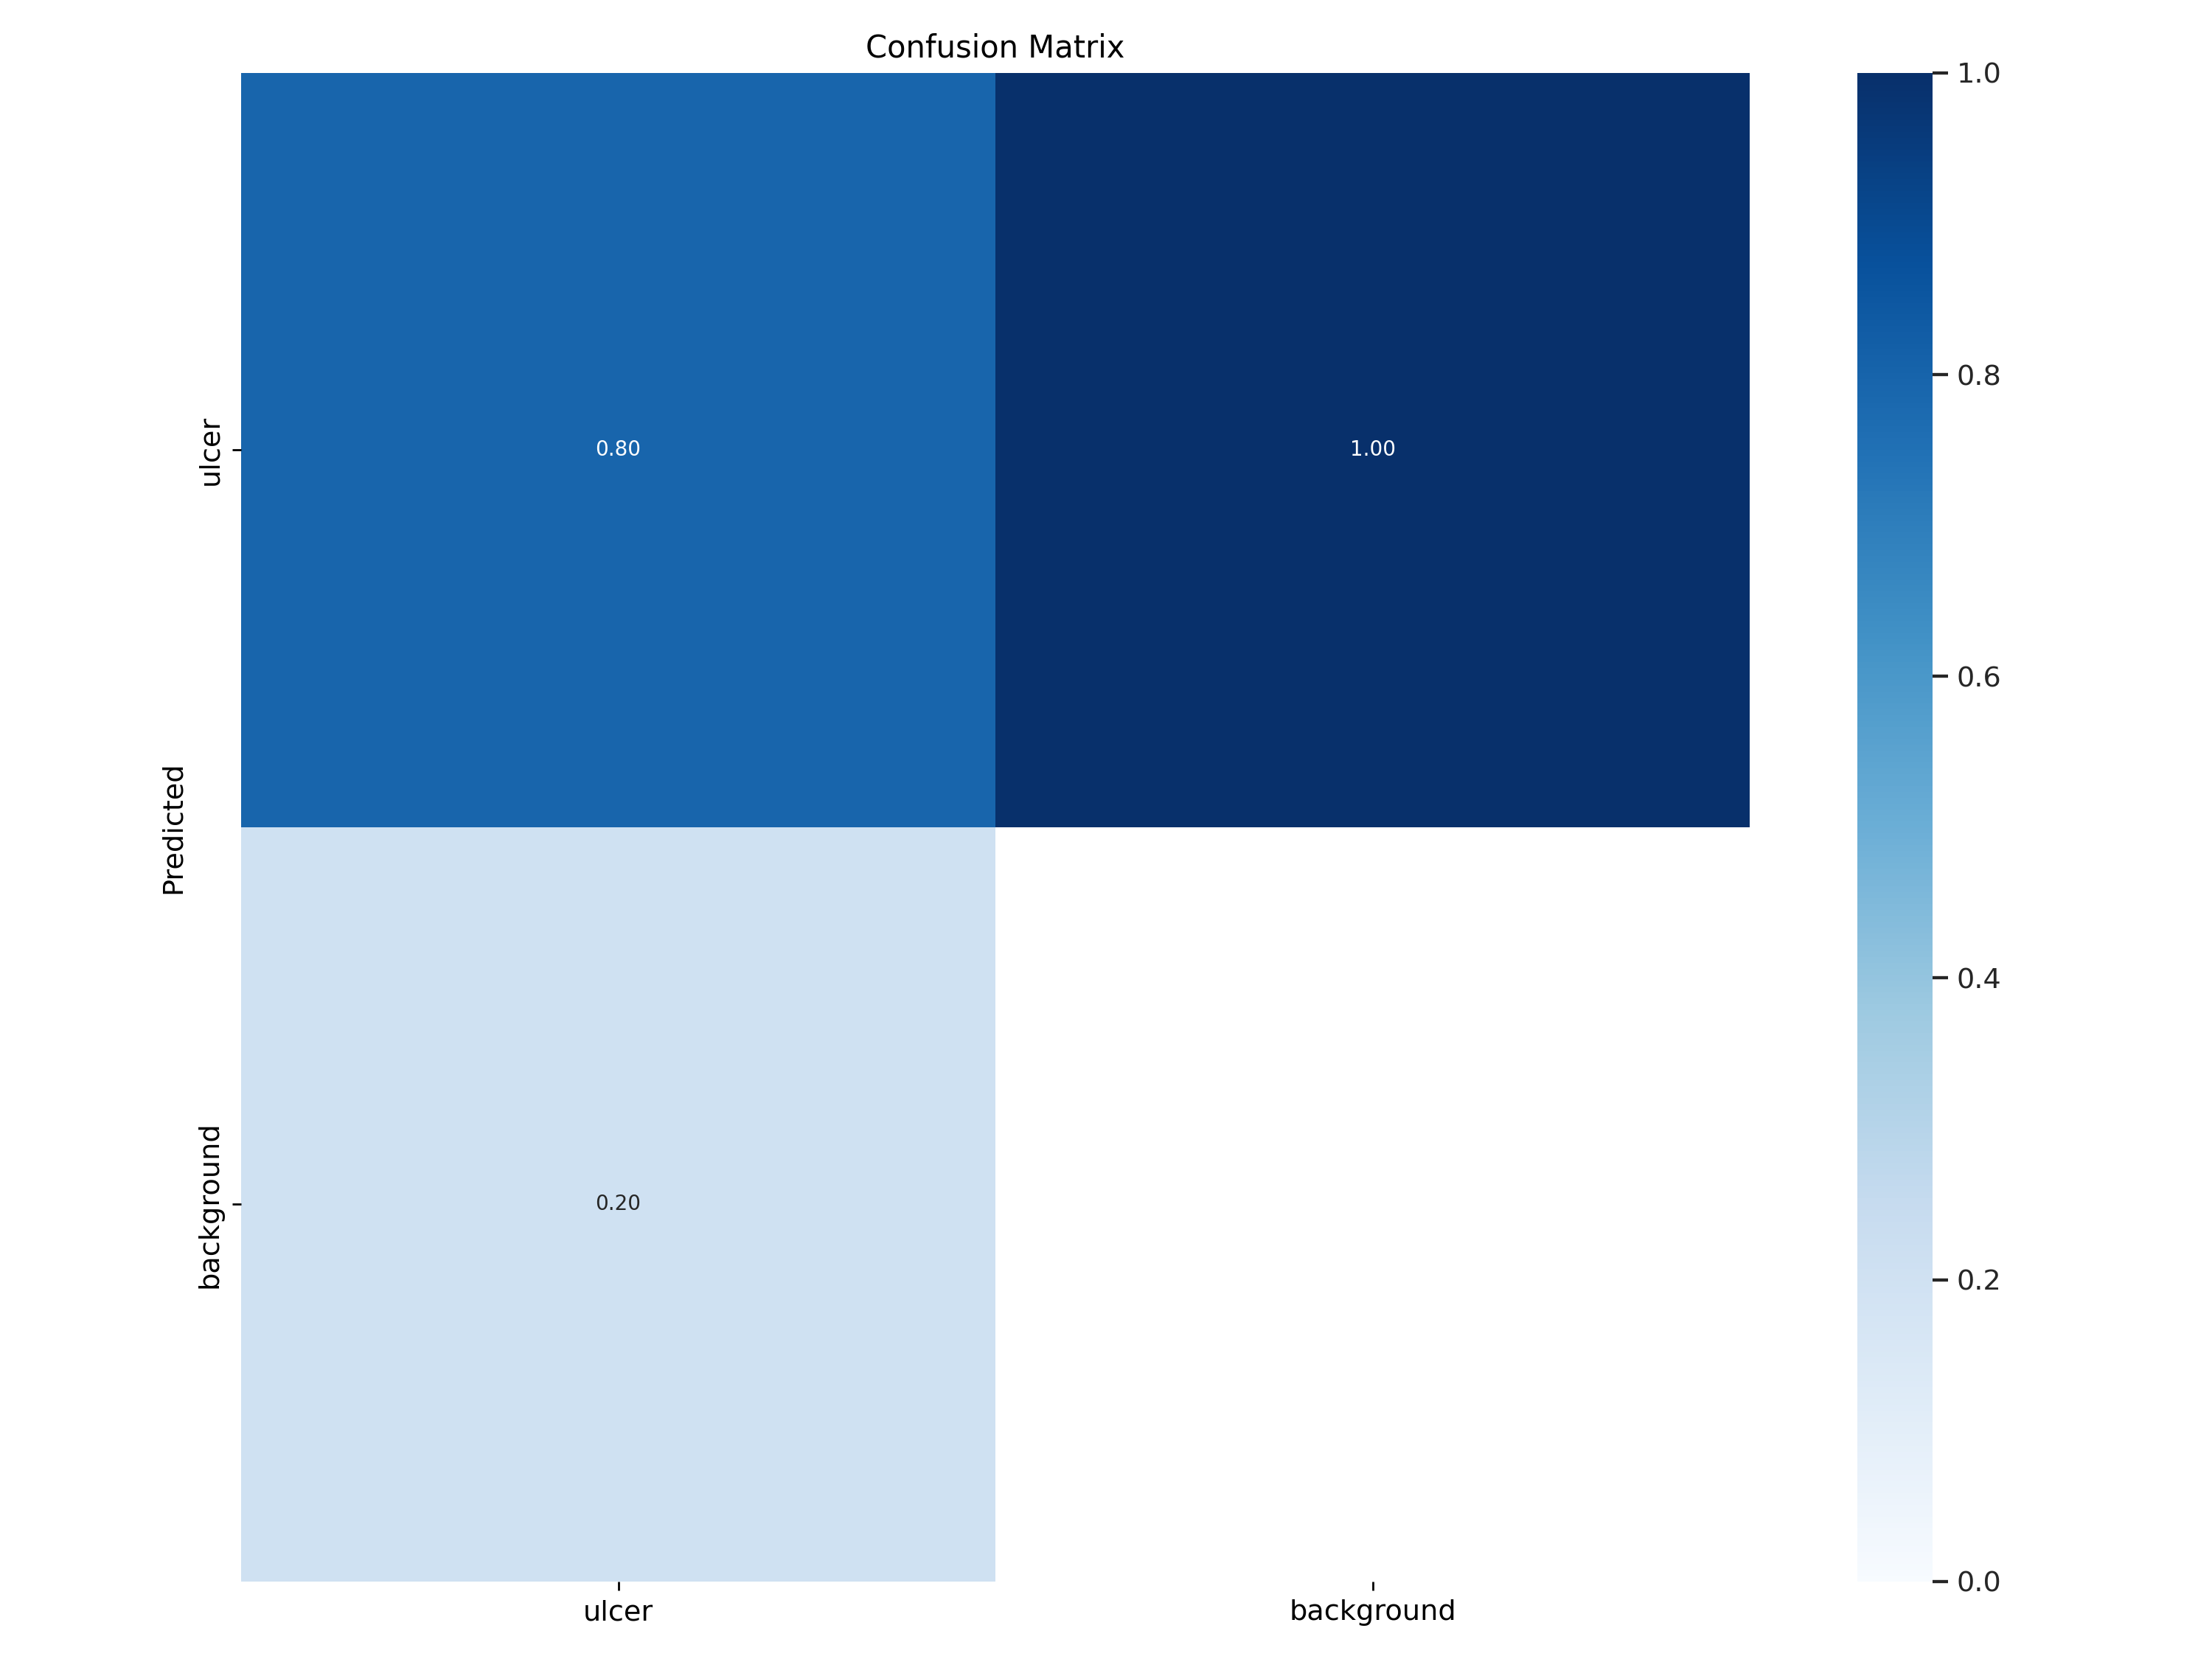

In [35]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/confusion_matrix.png", width=1000)

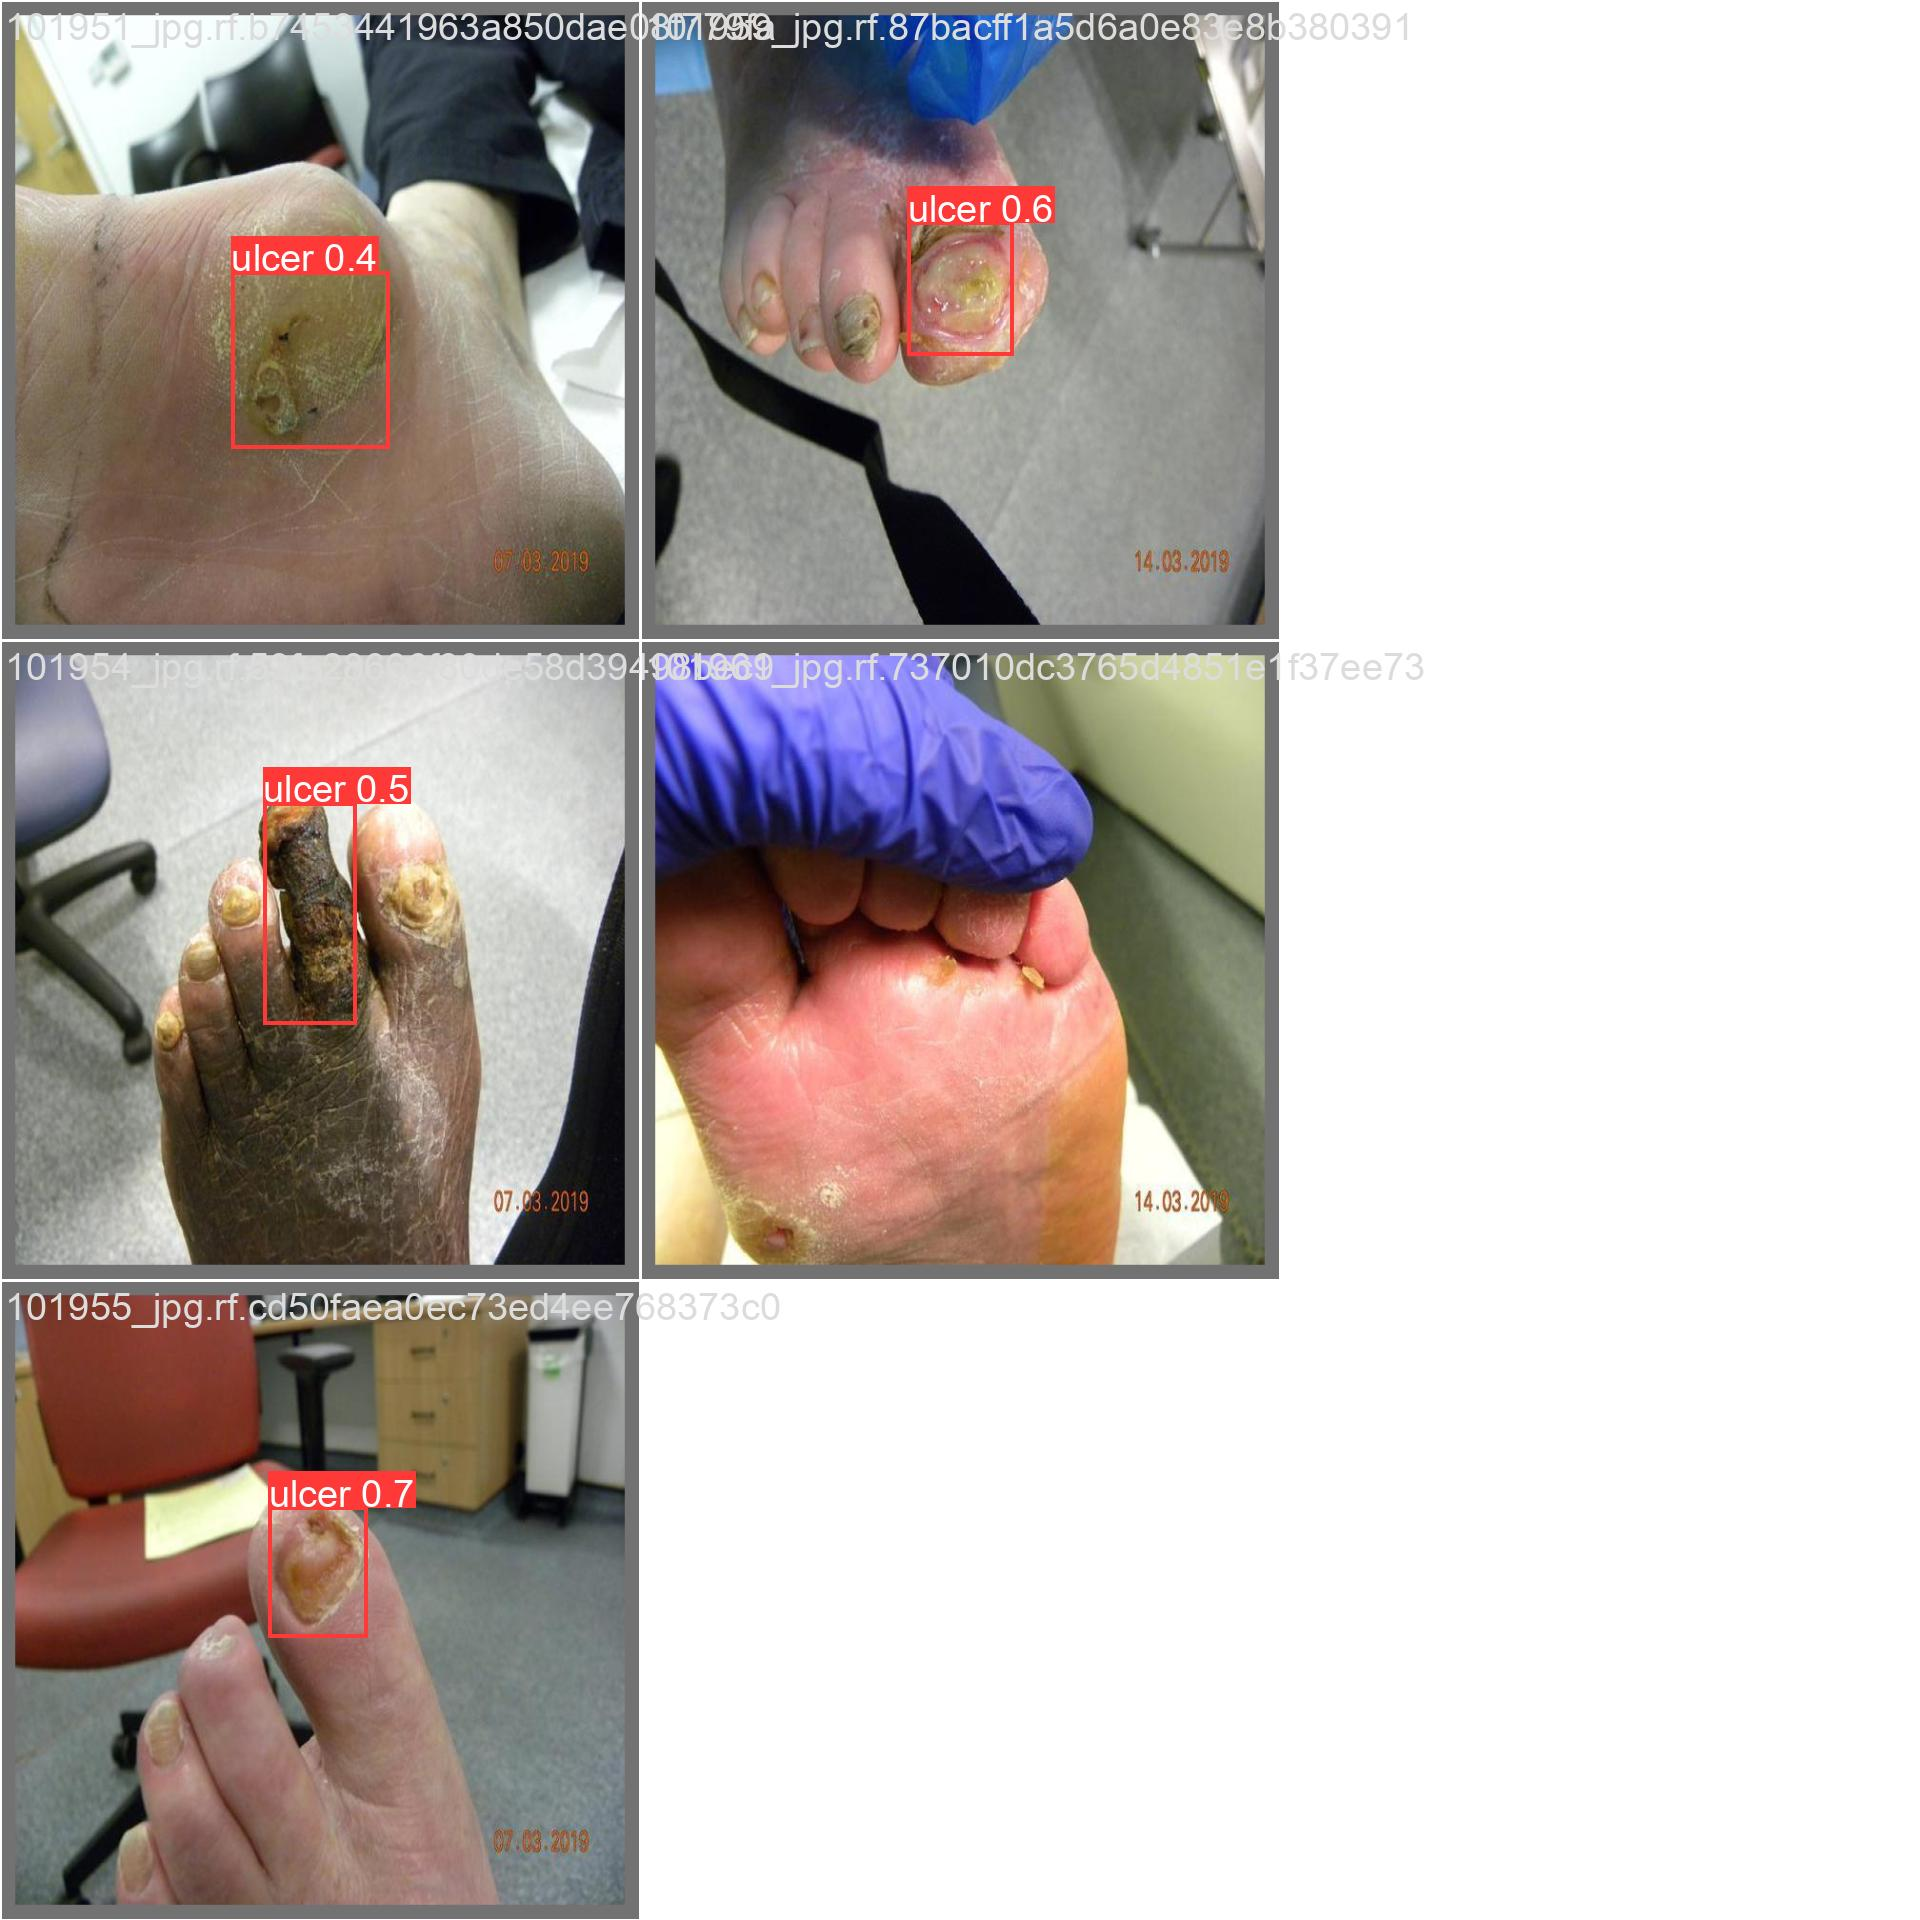

In [36]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch0_pred.jpg", width=1000)

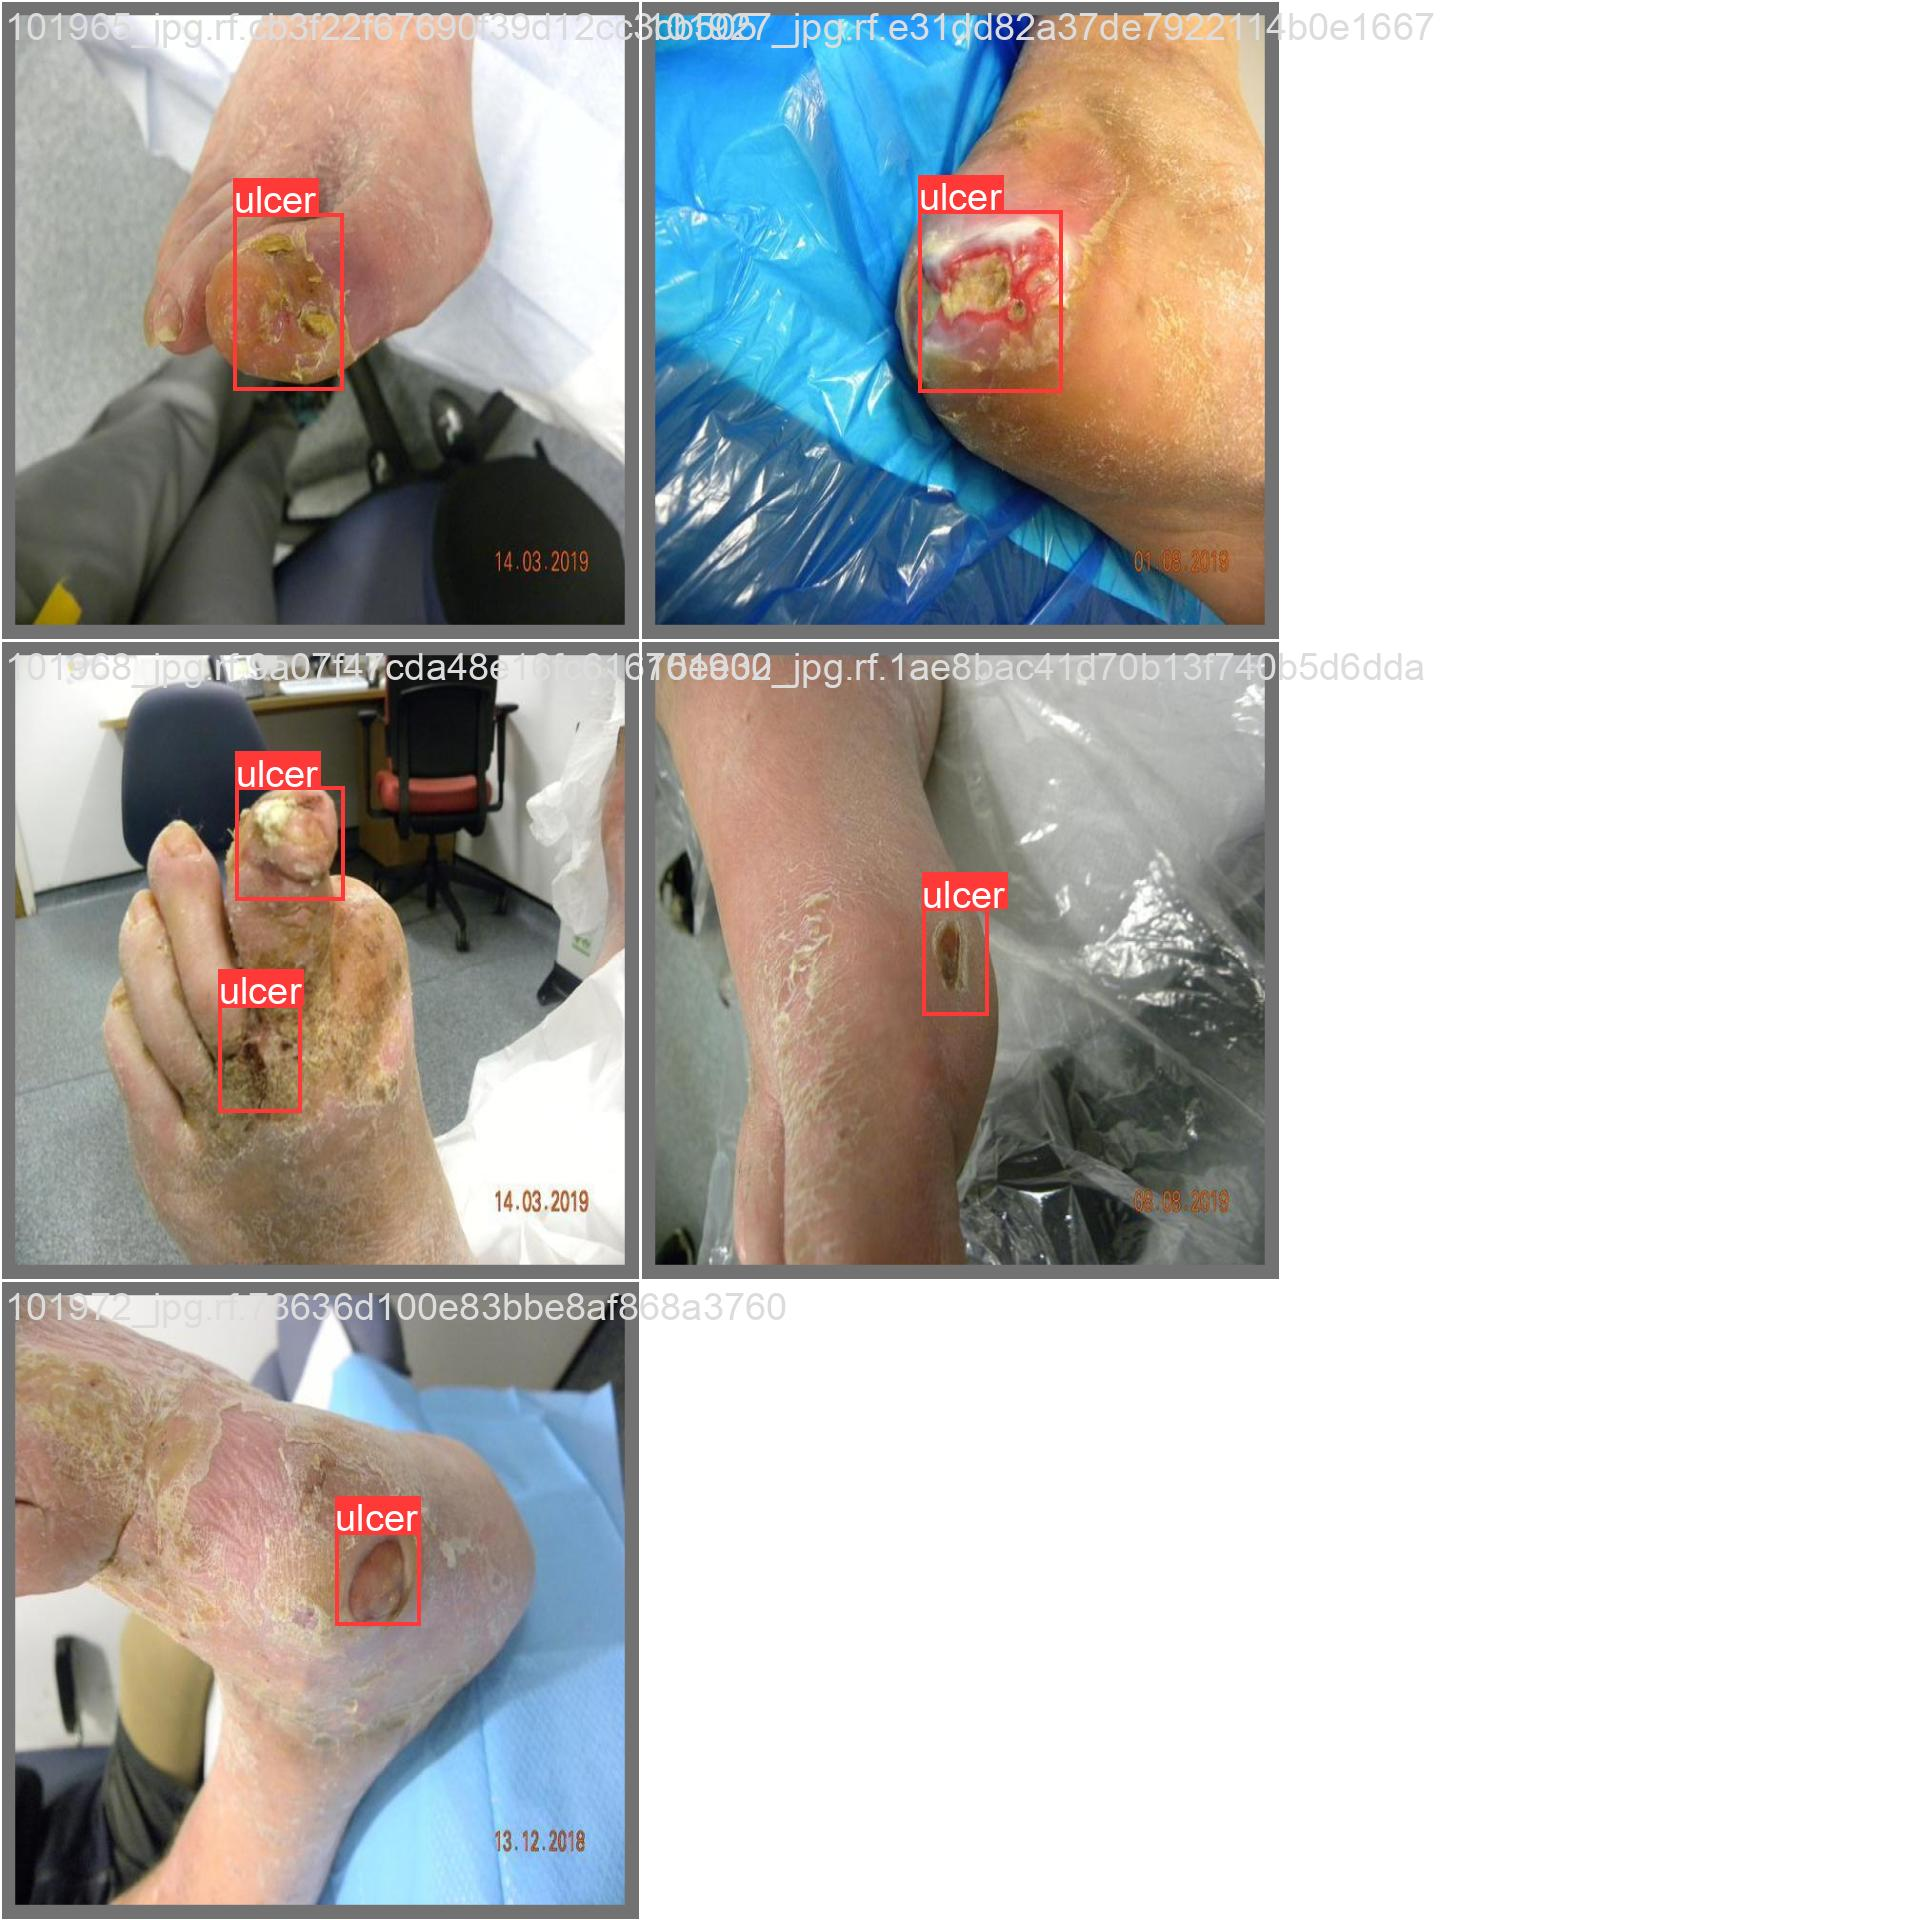

In [37]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch1_labels.jpg", width=1000)

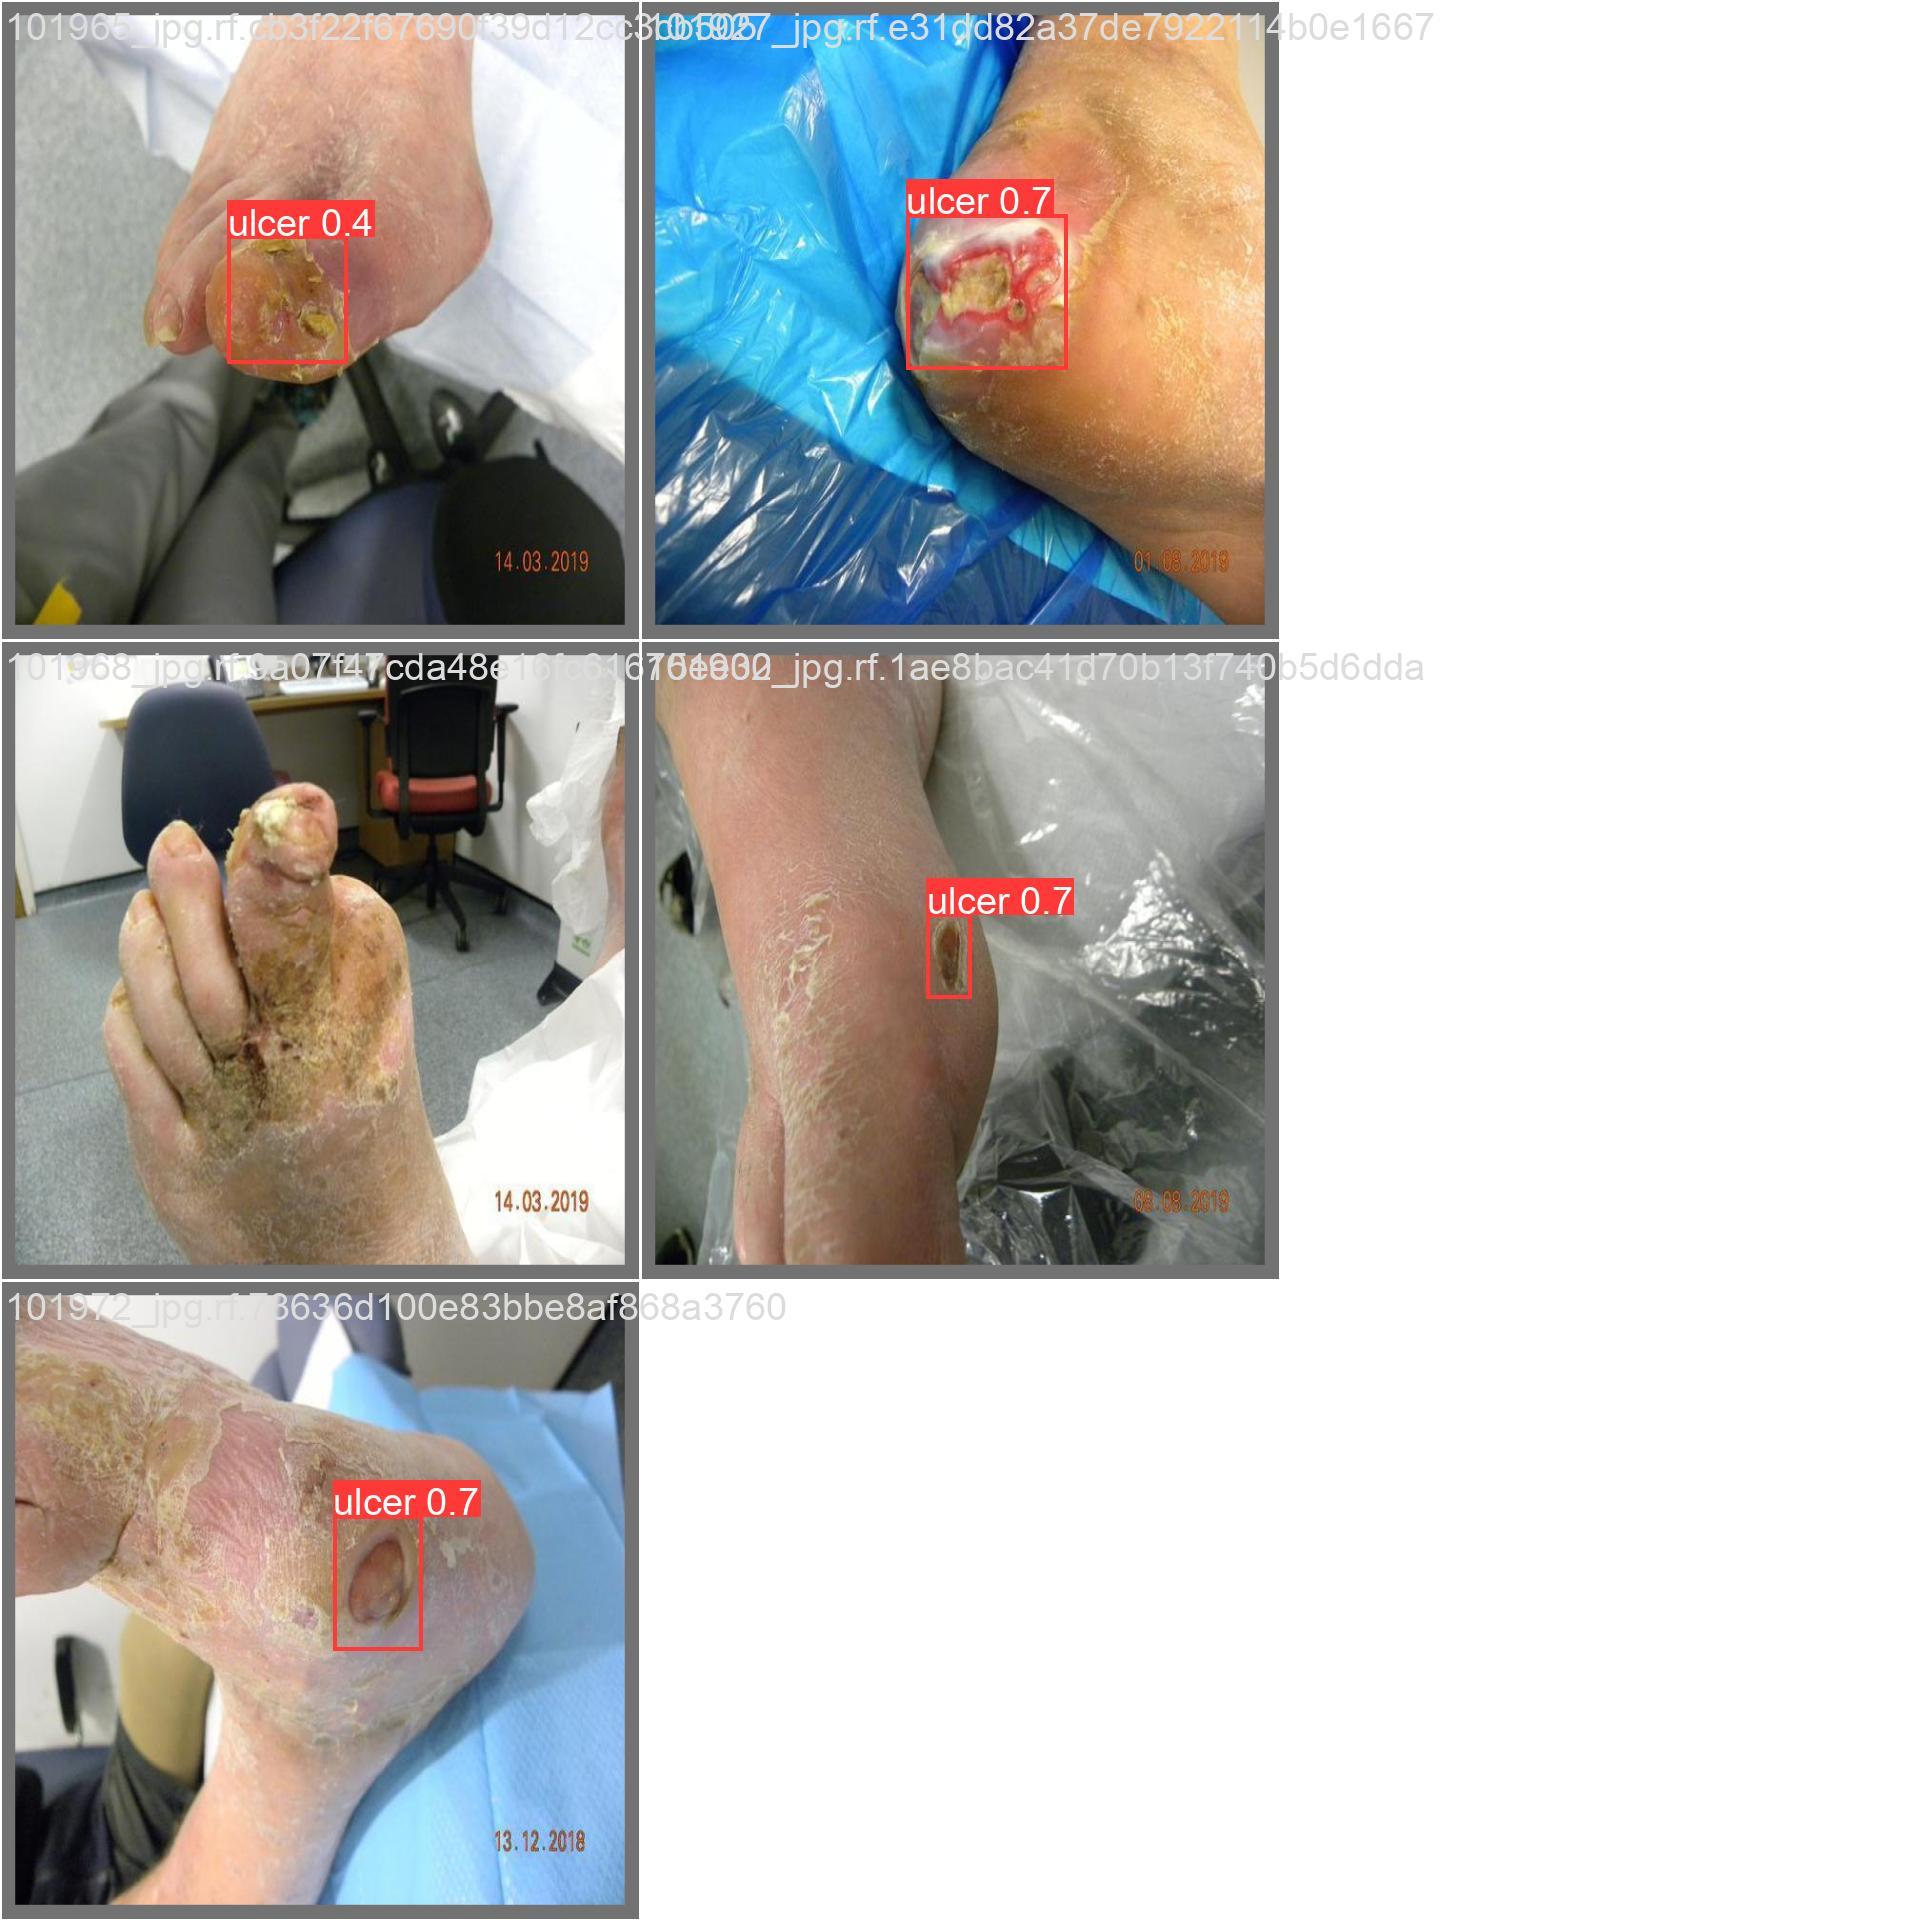

In [39]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch1_pred.jpg", width=1000)

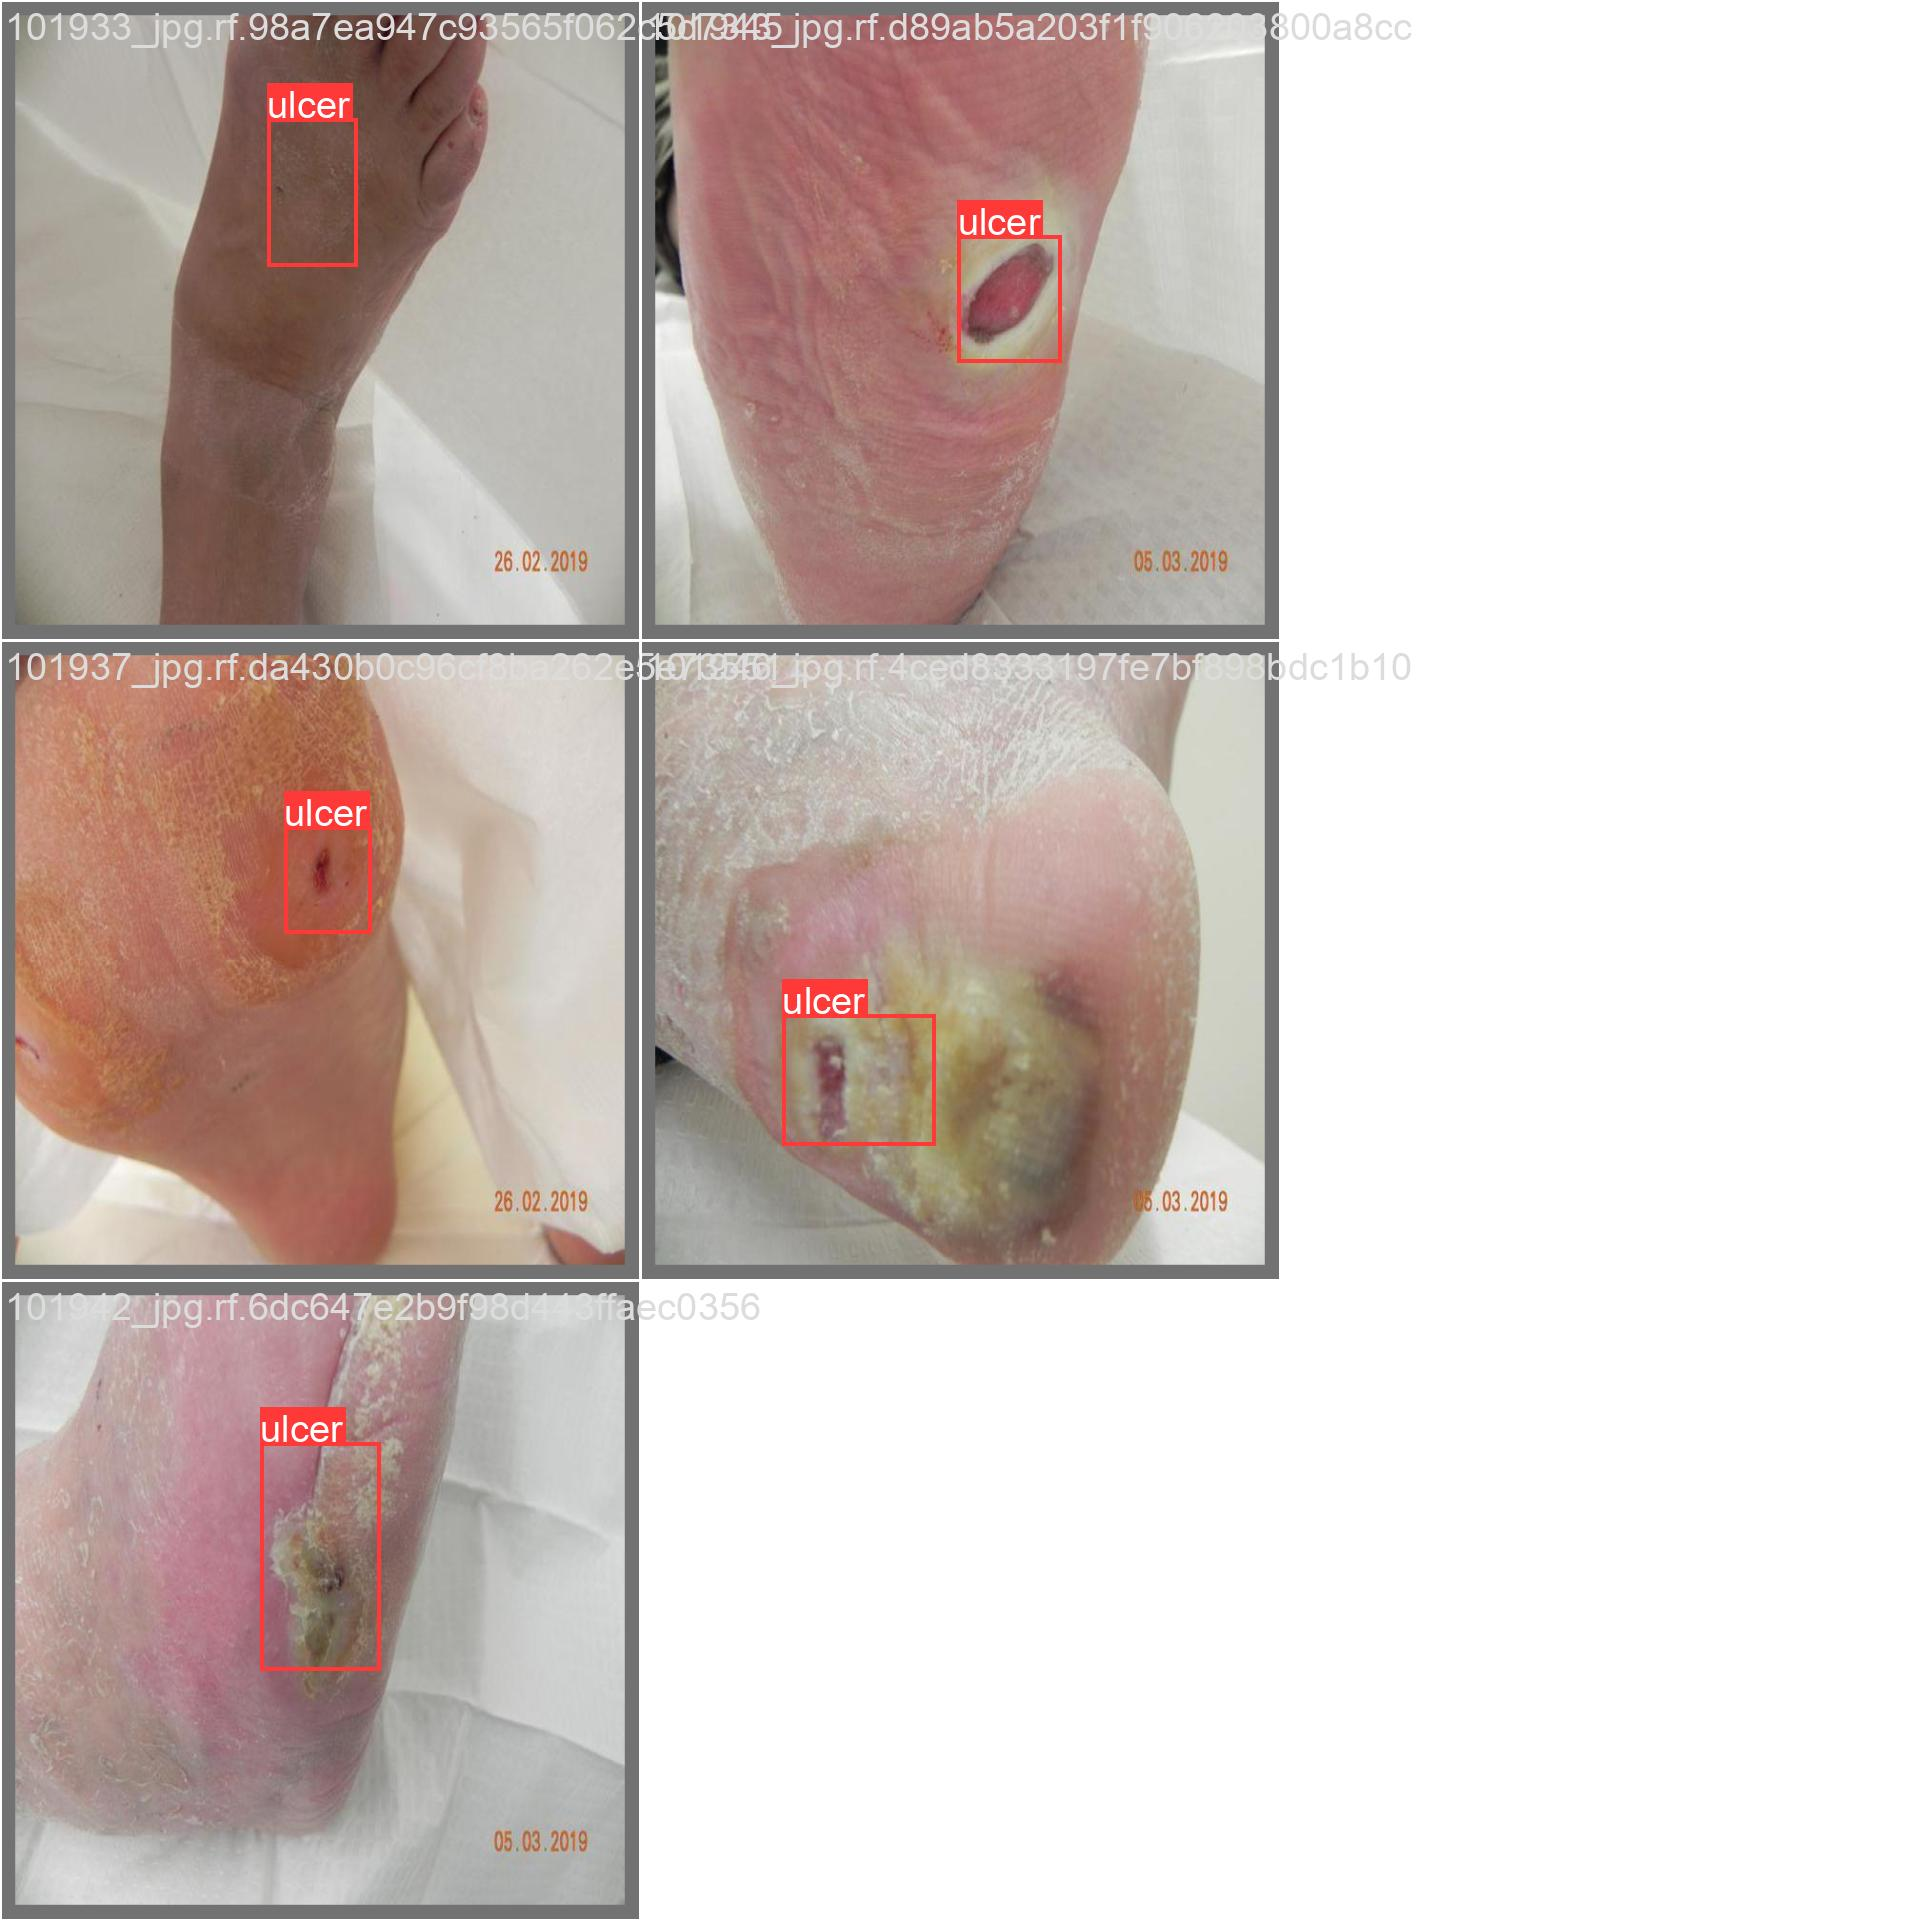

In [40]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch2_labels.jpg", width=1000)

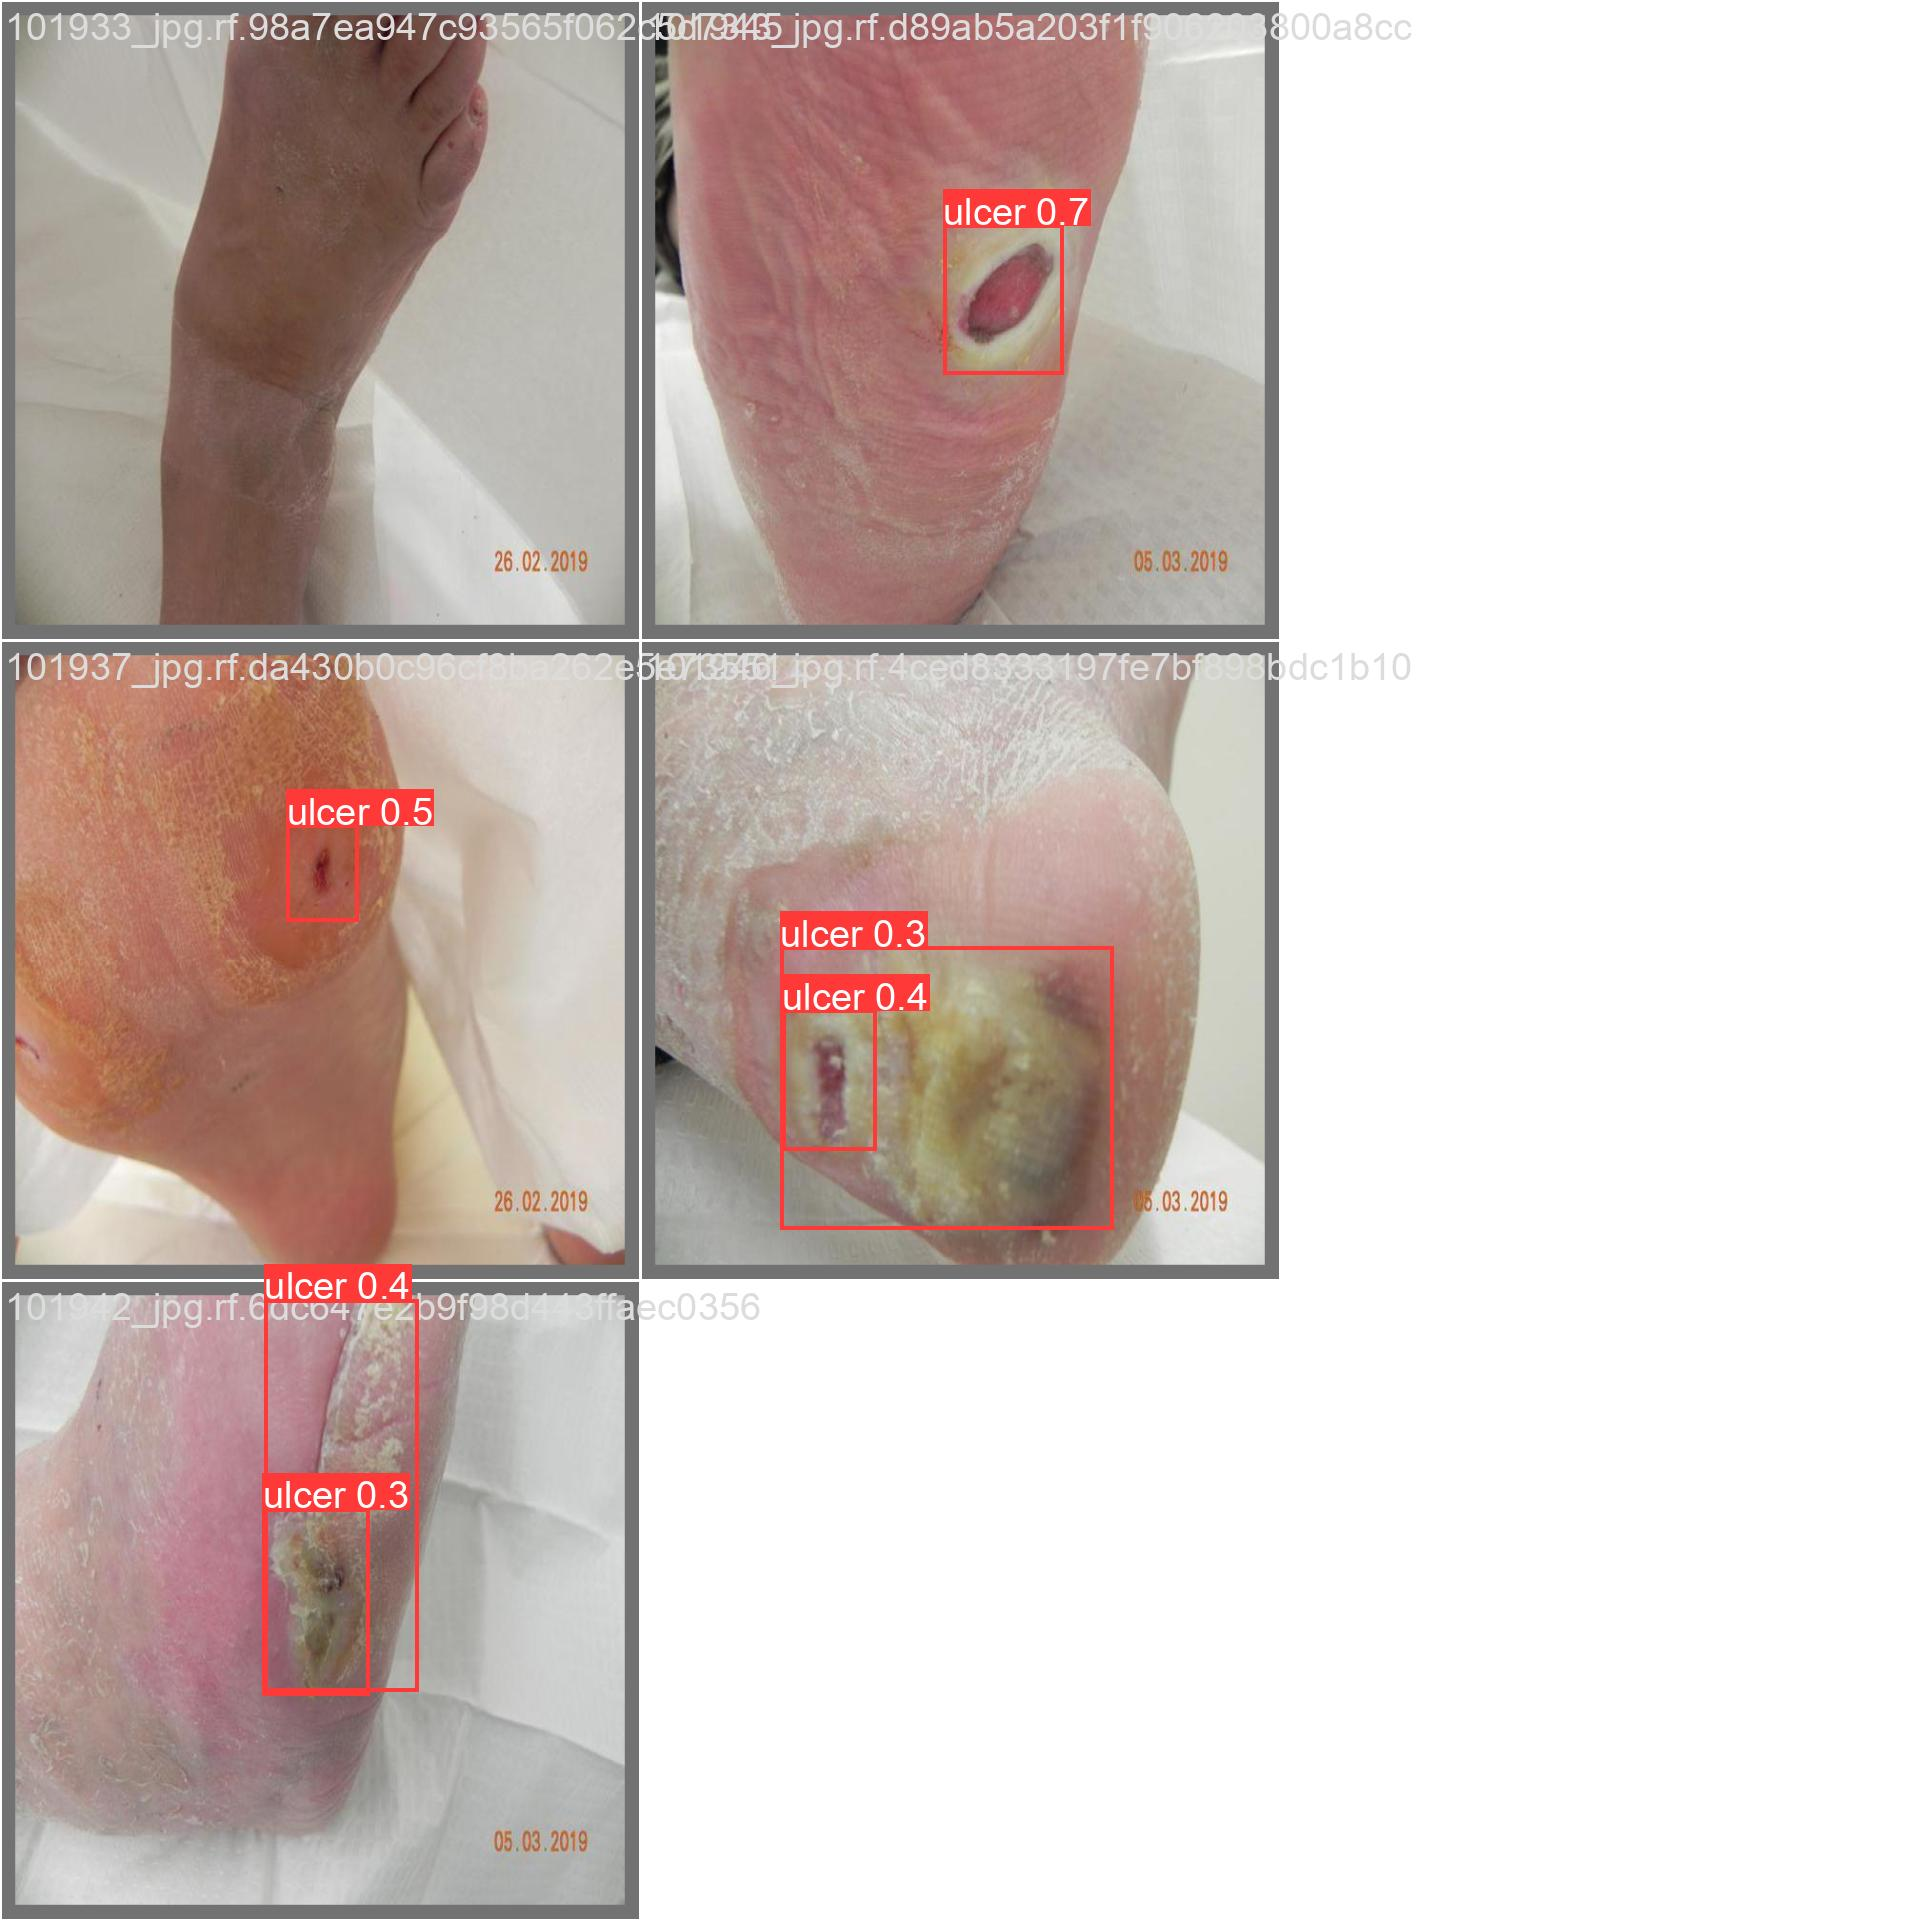

In [41]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch2_pred.jpg", width=1000)

In [42]:
import pandas as pd

# Path to the CSV file (replace with your actual file path)
csv_file = '/kaggle/working/yolov9/runs/train/exp/results.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Correct column names based on the available columns
columns_of_interest = ['               epoch', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']

# Check if all columns of interest are present in the DataFrame
missing_columns = [col for col in columns_of_interest if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Print the selected columns
    print(df[columns_of_interest].to_string(index=False))


                epoch     metrics/precision        metrics/recall       metrics/mAP_0.5  metrics/mAP_0.5:0.95
                    0               0.58258               0.47861               0.48739              0.200300
                    1               0.72387               0.49400               0.59472              0.213910
                    2               0.32228               0.28058               0.24536              0.082765
                    3               0.48500               0.42926               0.38192              0.117770
                    4               0.33459               0.39568               0.26833              0.094301
                    5               0.55246               0.44844               0.46978              0.172020
                    6               0.37407               0.42446               0.36453              0.135120
                    7               0.44301               0.42686               0.41402              0.152970
          